In [39]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

path = str(Path(Path('thermo.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from tools.cbook import pickle2Obj

import pickle

_nthreads = 2

models = {}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
models['solo'] = pickle2Obj('profiles/solo_3km_bubble2.pkl',retObj=False)

for key in models:
    # for key2 in models[key]:
    #     print(key, key2, models[key][key2])
    print(key, models[key]['w'].shape, models[key]['w'].max())

solo (100, 24) 25.434587


In [41]:

#models['mpas'] = pickle2Obj('profiles/cm1_squall_3km_test.pkl',retObj=False)

In [52]:
#--------------------------------------------------------------------------------------------
def plot_profile(profile, var, zhgts, ax, color, mlabel, step=None, percentile=None, linewidth=2.0, linestyle='solid'):

    label = "%s NOBJ:  %d" % (mlabel, profile[var].shape[1])

    p = profile[var][:,step[0]:step[1]]
                    
    label = "%s NOBJ:  %d" % (mlabel, p.shape[1])       
            
    ax.plot(p.mean(axis=1), zhgts, color=color, linewidth=linewidth, label=label, linestyle=linestyle)

#--------------------------------------------------------------------------------------------
# define plotting sub

def plot_wprofile_driver(models, variable = 'w', step = [0,-1], plabel = "", percentile=None):
    
    imin = step[1]
    if imin < 0:
        imin = 24
    hour = float(imin)*5/60

    titles = ["0-%2.1f Hour Updraft Profiles" % hour, "2-4 Hour Updraft Profiles", "4-6 Hour Updraft Profiles"]

    xvert  = [6.0, 8.0, 12.5]
    if percentile == None:
        xlim   = [20.0, 8.0, 8.0]
    else:
        xlim   = [15.0, 10.0, 10.0]

    zhgts = 250. + 250.*np.arange(100)
            
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(7,10))
                       
    label = "bubble"

    for key in models:

        mdata = models[key]

        if key == 'solo':
            plot_profile(mdata, variable, zhgts, ax, 'r', "FV3-D4_12", step=step, linewidth=2.0, percentile=percentile)

        if key == 'solo1':
            plot_profile(mdata, variable, zhgts, ax, 'r', "FV3-D4_06", step=step, linewidth=0.75, linestyle='-', percentile=percentile)

        if key == 'solo2':
            plot_profile(mdata, variable, zhgts, ax, 'r', "FV3-D4_03", step=step, linewidth=1.25, linestyle='--', percentile=percentile)

        if key == 'solo3':
            plot_profile(mdata, variable, zhgts, ax, 'r', "FV3-DDDMP04", step=step, linewidth=0.75, linestyle='-', percentile=percentile)

        if key == 'solo4':
            plot_profile(mdata, variable, zhgts, ax, 'r', "FV3-DDDMP25", step=step, linewidth=1.25, linestyle='--', percentile=percentile)

        if key == 'cm1':
            plot_profile(mdata, variable, zhgts, ax, 'b', "CM1", step=step, linewidth=2.0, percentile=percentile)

        if key == 'wrf':
            plot_profile(mdata, variable, zhgts, ax, 'k', "WRF", step=step, linewidth=2.0, percentile=percentile)

        if key == 'mpas':
            plot_profile(mdata, variable, zhgts, ax, 'g', "MPAS", step=step, linewidth=2.0, percentile=percentile)

    if percentile == None:
        ax.set_title("%s SHEAR: %s (m/s)" % (titles[0],"0"), fontsize=14)
    else:
        ax.set_title("(%d percentile) %s SHEAR: %s (m/s)" % (np.int(percentile*100), titles[0],"0"), fontsize=14)

    ax.axhline(y=6000., color='k', linestyle='-')
    ax.axhline(y=8000., color='k', linestyle='-')
    ax.axhline(y=10000., color='k', linestyle='-')
    ax.axvline(x=0.0, color='k', linestyle='--')
    ax.axvline(x=xvert[0], color='k', linestyle='--')
    ax.legend(fontsize=14, loc='upper right')
    ax.set_xlim(-2.0,xlim[0])
    ax.set_xlabel("%s" % variable, fontsize=18)
    ax.set_ylabel("Height(m)", fontsize=18)
    ax.set_ylim(0.0,25000.)

    plt.suptitle("%s  CAPE = %s" % (plabel, "2000"), fontsize=24)
    if percentile == None:
        plt.savefig("WProfiles_%s_Experiment_%s.png" % (plabel,label))
    else:
        plt.savefig("WProfiles_%d_percentile_%s_Experiment_%s.png" % (np.int(percentile*100), plabel,label))

plt.show()

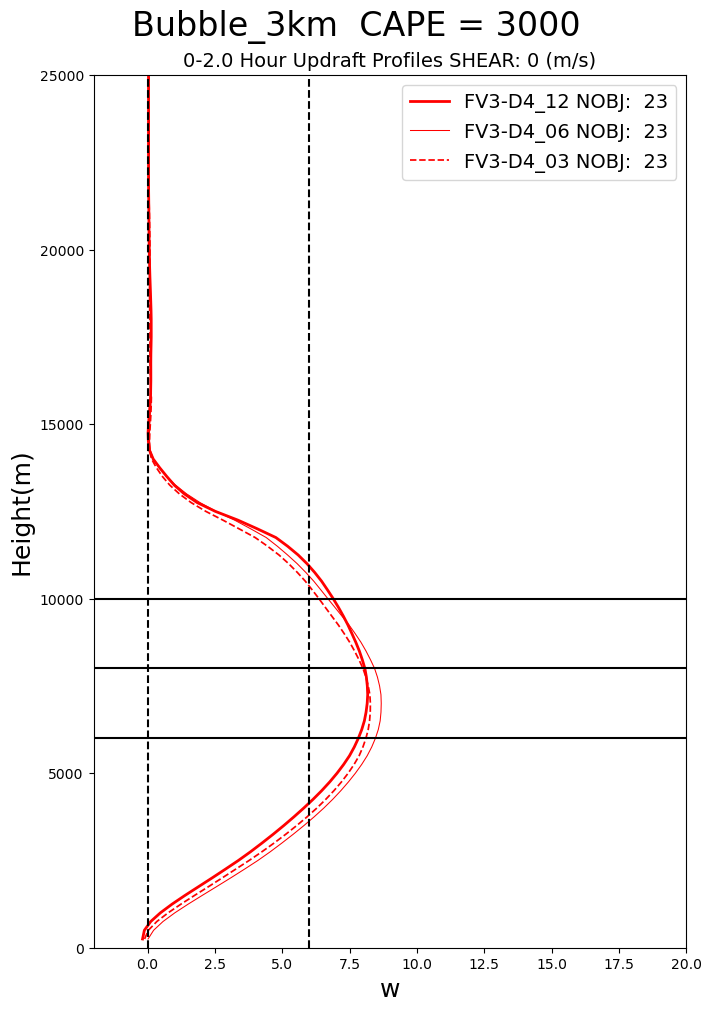

In [53]:
# Set profiles up

models = {}

models['solo'] = pickle2Obj('profiles/solo_3km_bubble2.pkl',retObj=False)
models['solo1'] = pickle2Obj('profiles/solo1_3km_bubble2.pkl',retObj=False)
models['solo2'] = pickle2Obj('profiles/solo2_3km_bubble2.pkl',retObj=False)

# models['solo'] = pickle2Obj('profiles/solo_squall_3km_HDD.pkl',retObj=False)
# models['wrf']  = pickle2Obj('profiles/wrf_squall_3km_test.pkl', retObj=False)
# models['cm1']  = pickle2Obj('profiles/cm1_squall_3km_test.pkl',retObj=False)

# plot profiles

plot_wprofile_driver(models, plabel = 'Bubble_3km')

#plot_wprofile_driver(models, plabel = 'Bubble_3km', step = [0,12])

# models = {}
# models['solo'] = pickle2Obj('profiles/solo_squall_3km_final.pkl',retObj=False)
# # models['cm1'] = pickle2Obj('profiles/cm1_squall_3km_final.pkl',retObj=False)
# # models['wrf'] = pickle2Obj('profiles/wrf_squall_3km_final.pkl',retObj=False)

# models['solo1']  = pickle2Obj('profiles/solo_squall_3km_d4_bg03_final.pkl', retObj=False)
# models['solo2']  = pickle2Obj('profiles/solo_squall_3km_d4_bg06_final.pkl',retObj=False)
# plot_wprofile_driver(models, plabel = 'Squall_3km', step = [0,3], percentile=None)

In [50]:
#--------------------------------------------------------------------------------------------
# define plotting sub

def plot_bprofile_driver(models, variable = 'w', step = [1,16], plabel = "", percentile=None):

    titles = ["0-6 Hour Updraft Profiles", "2-4 Hour Updraft Profiles", "4-6 Hour Updraft Profiles"]

    xvert  = [0.0, 8.0, 12.5]
    # if percentile == None:
    #     xlim   = [[-]
    # else:
    #      xlim   = [15.0, 10.0, 10.0]

    zhgts = 250. + 250.*np.arange(100)
    
    allcape = ( "C2000", "C3500")
    allshear = ("06", "18")
        
    for cape in allcape:
        
        fig, ax = plt.subplots(1,len(allcape), constrained_layout=True,figsize=(7*len(allcape),10))

        for n, shear in enumerate(allshear):
                       
            label = "%s_%s" % (cape, shear)

            for key in models:

                mdata = models[key][label]
                
                if key == 'solo':
                    plot_profile(mdata, variable, zhgts, ax[n], 'r', "FV3-NOR3", step=step, linewidth=2.0, percentile=percentile)
                
                if key == 'solo2':
                    plot_profile(mdata, variable, zhgts, ax[n], 'g', "FV3-NOR2", step=step, linewidth=1.0, linestyle='-', percentile=percentile)
                    
                if key == 'solo1':
                    plot_profile(mdata, variable, zhgts, ax[n], 'g', "FV3-NOR1", step=step, linewidth=1.0, linestyle='--', percentile=percentile)

                if key == 'cm1':
                    plot_profile(mdata, variable, zhgts, ax[n], 'b', "CM1", step=step, linewidth=2.0, percentile=percentile)

                if key == 'wrf':
                    plot_profile(mdata, variable, zhgts, ax[n], 'k', "WRF", step=step, linewidth=2.0, percentile=percentile)

                if key == 'mpas':
                    plot_profile(mdata, variable, zhgts, ax[n], 'g', "MPAS", step=step, linewidth=2.0, percentile=percentile)

            if percentile == None:
                ax[n].set_title("%s SHEAR: %s (m/s)" % (titles[0],shear), fontsize=14)
            else:
                ax[n].set_title("(%d percentile) %s SHEAR: %s (m/s)" % (np.int(percentile*100), titles[0],shear), fontsize=14)
                
            ax[n].axhline(y=6000., color='k', linestyle='-')
            ax[n].axhline(y=8000., color='k', linestyle='-')
            ax[n].axhline(y=10000., color='k', linestyle='-')
            ax[n].axvline(x=xvert[0], color='k', linestyle='--')
            ax[n].legend(fontsize=14, loc='upper right')
            ax[n].set_xlim(-800,800)
            ax[n].set_xlabel("%s" % variable, fontsize=18)
            ax[n].set_ylabel("Height(m)", fontsize=18)
            ax[n].set_ylim(0.0,25000.)

            plt.suptitle("%s  CAPE = %s" % (plabel, cape[1:]), fontsize=24)
            
            if percentile == None:
                plt.savefig("BProfiles_%s_Experiment_%s.png" % (plabel,label))
            else:
                plt.savefig("BProfiles_%d_percentile_%s_Experiment_%s.png" % (np.int(percentile*100), plabel,label))
            
        plt.show()

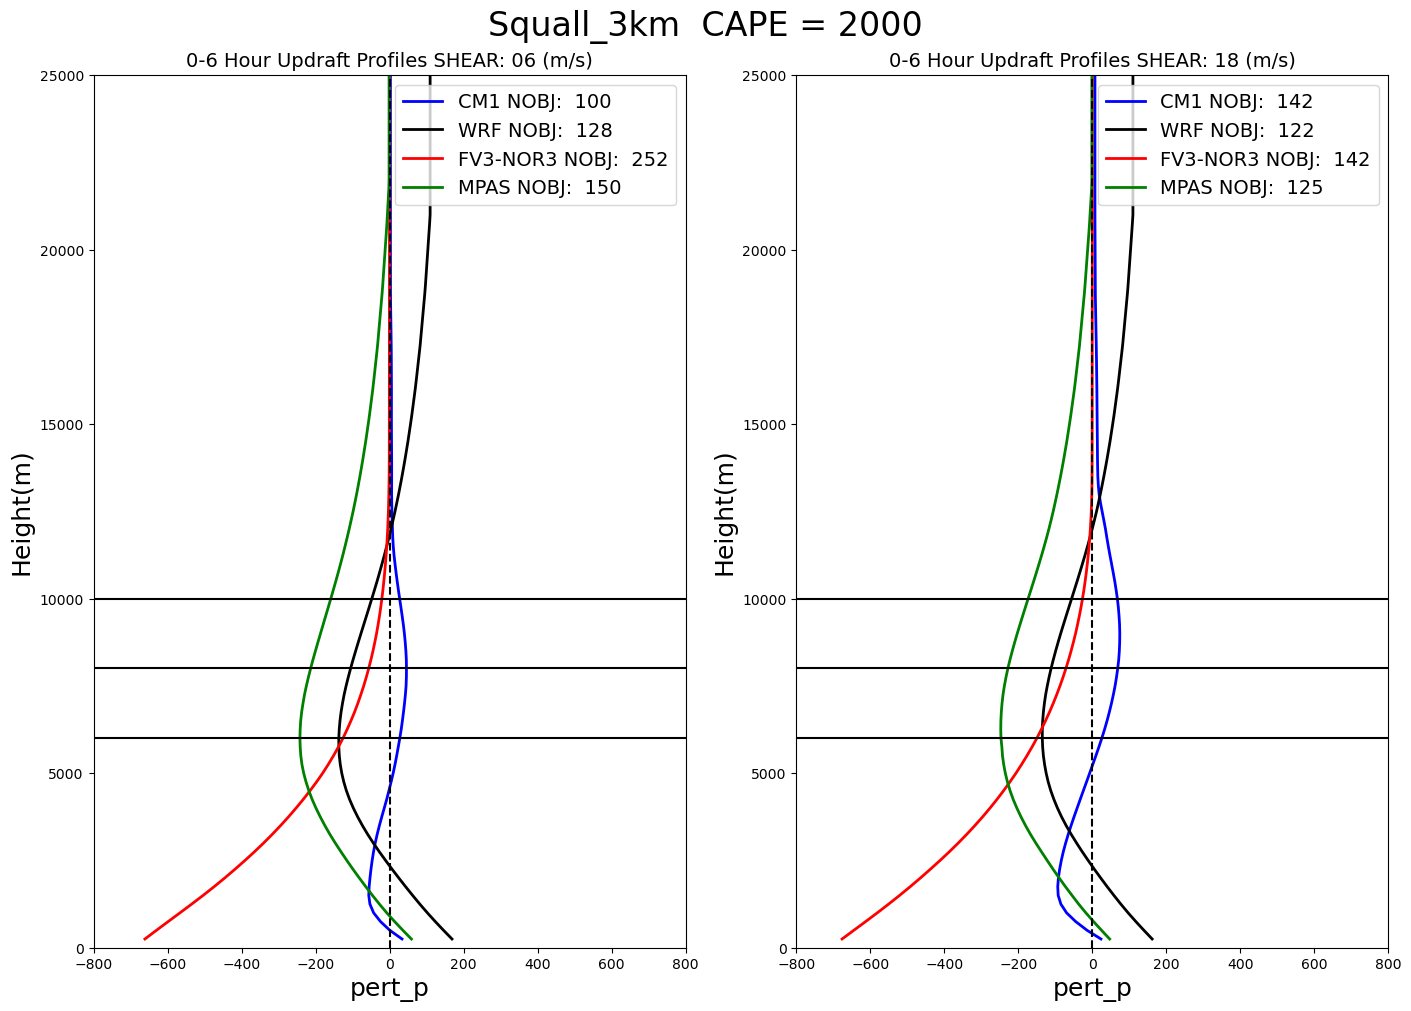

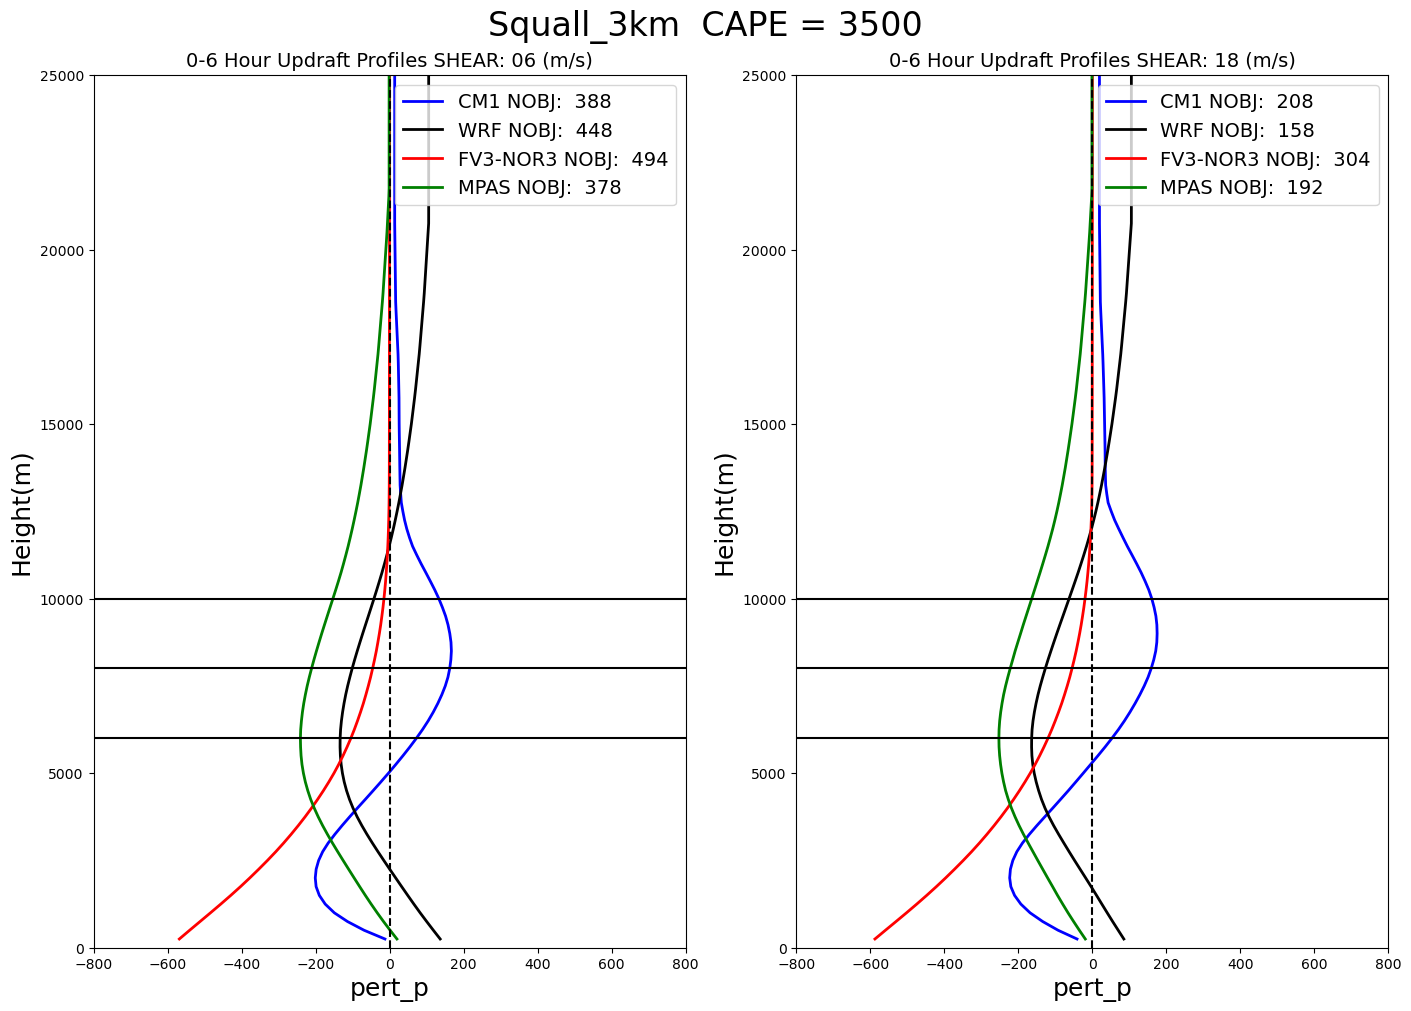

In [58]:
plot_bprofile_driver(models, variable='pert_p', plabel = 'Squall_3km')

In [67]:
#----------------------------------------------------
def plot_sizes_driver(models, plabel=""):
    
    titles = ["0-6 Hour Updraft Sizes", "0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes"]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18")
    
    step = [[0,-1], [0,8],[8,16]]

    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
            
            for key in models:
                
                mdata = models[key]

                for n, s in enumerate(step):

                    t0 = mdata[label]['tindex'][s[0]]
                    t1 = mdata[label]['tindex'][s[1]]
                    ss = np.sort(mdata[label]['size'][t0:t1])

                    zhgt = np.arange(len(ss))/float(len(ss))

                    if key == 'solo':
                        ax[n].plot(ss, zhgt, color='r', label='FV3-NOR3', linewidth=2.0)
                        
                    if key == 'solo2':
                        ax[n].plot(ss, zhgt, color='g', label='FV3-NOR2', linewidth=2.0, linestyle='--')
                
                    if key == 'solo1':
                        ax[n].plot(ss, zhgt, color='g', label='FV3-NOR1', linewidth=2.0, linestyle='-')
                        
                    if key == 'cm1':
                        ax[n].plot(ss, zhgt, color='b', label='CM1', linewidth=2.0)
                    
                    if key == 'wrf':
                        ax[n].plot(ss, zhgt, color='k', label='WRF', linewidth=2.0)
                    
                    if key == 'mpas':
                        ax[n].plot(ss, zhgt, color='g', label='MPAS', linewidth=2.0)

                    ax[n].set_title("%s - (Updraft Size in Pixels)" % (titles[n]), fontsize=14)
                    ax[n].axhline(y=0.5, color='k', linestyle='--')
                    ax[n].axhline(y=0.9,  color='k', linestyle='--')

                    ax[n].set_ylim(0.0,1.1)
                    ax[n].set_xlim(0,50)
                    ax[n].legend(fontsize=14, loc='lower right')
            
            plt.suptitle("%s %s" % (plabel, label), fontsize=18)
            plt.savefig("Pixel_Size_%s.png" % (label))

            

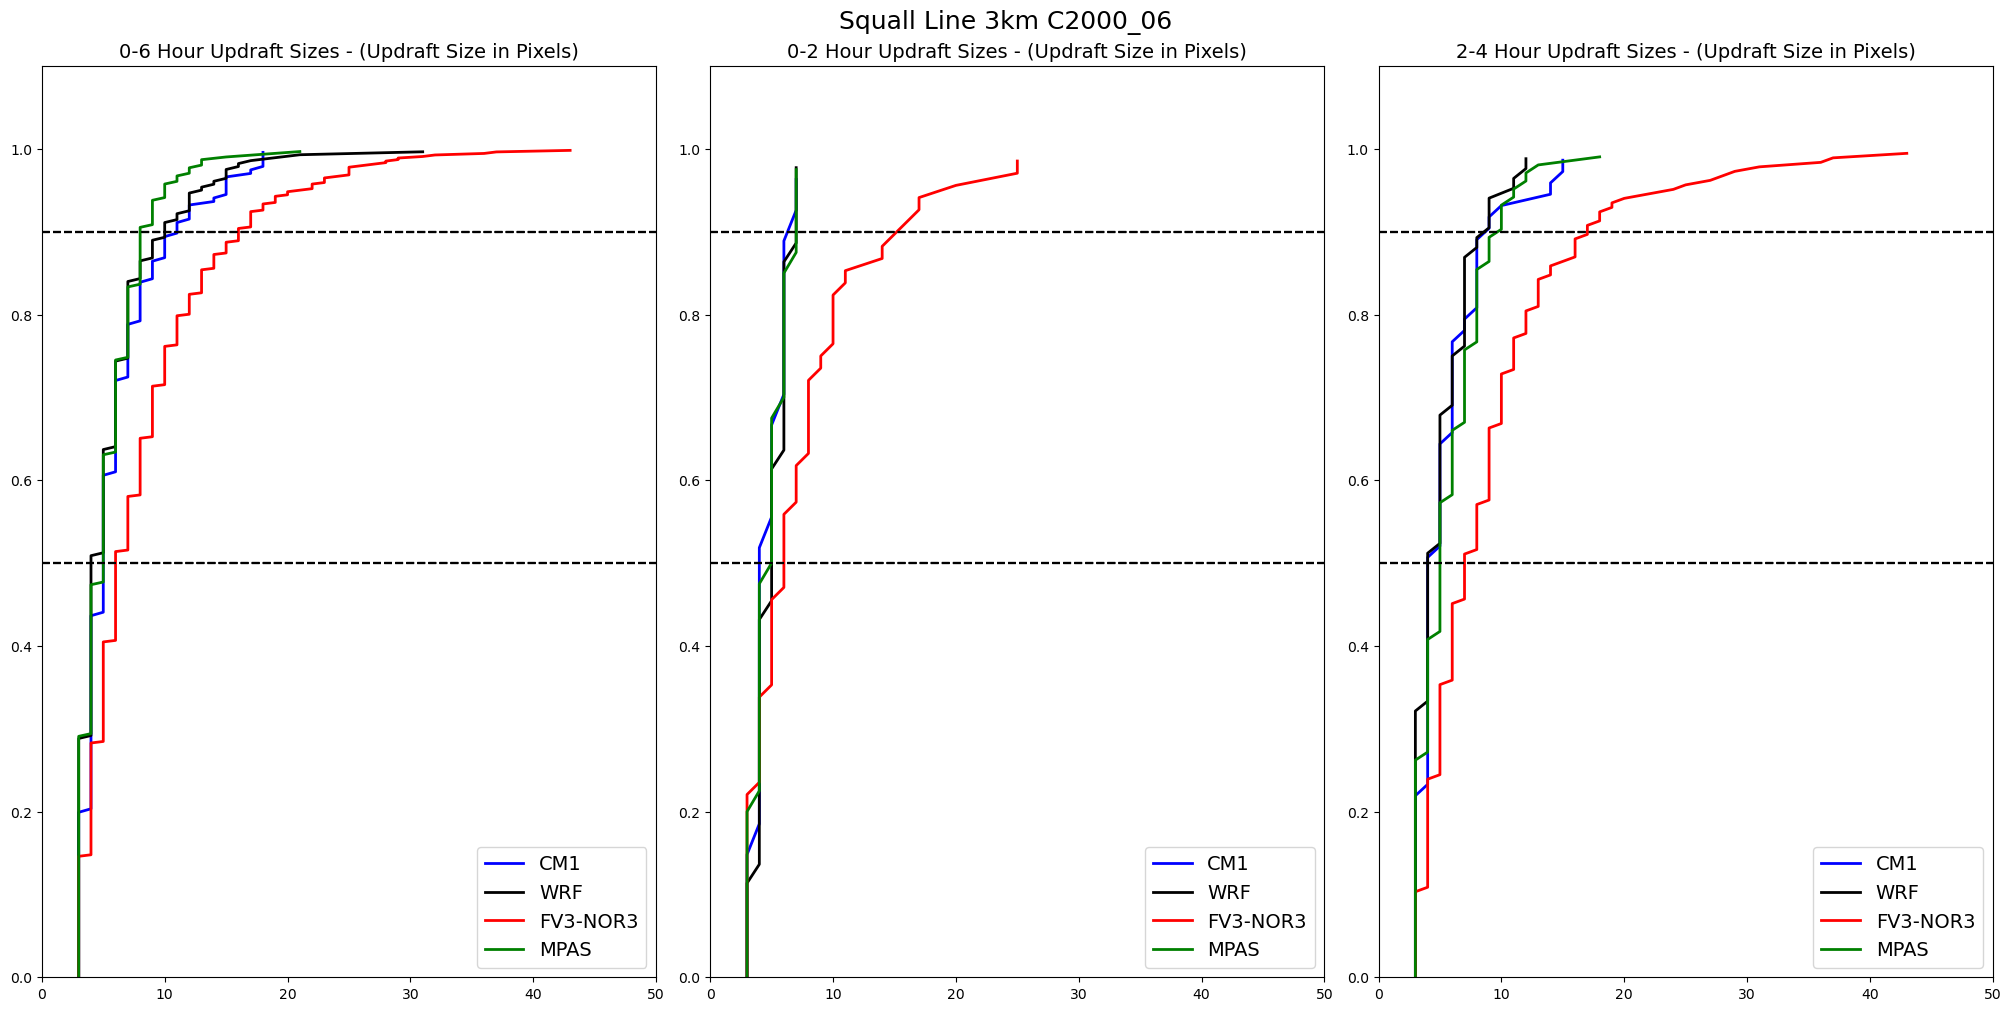

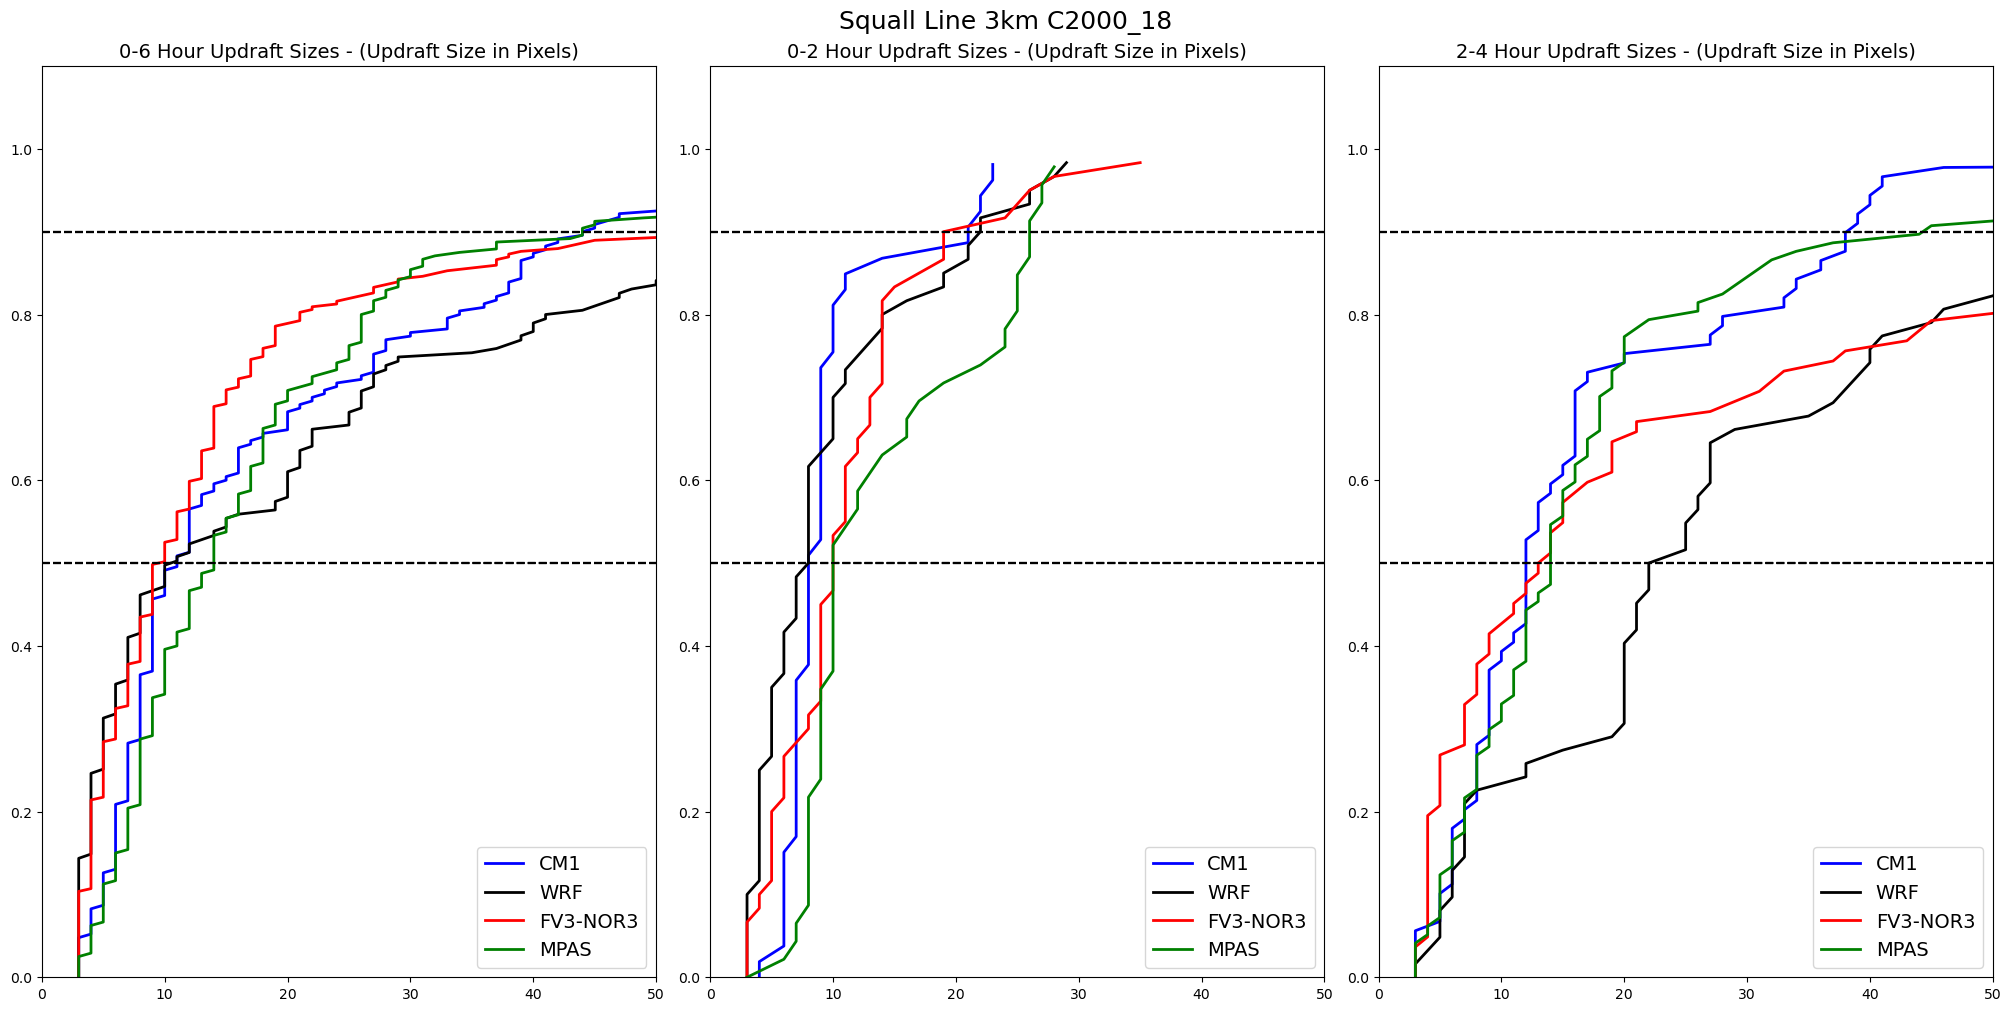

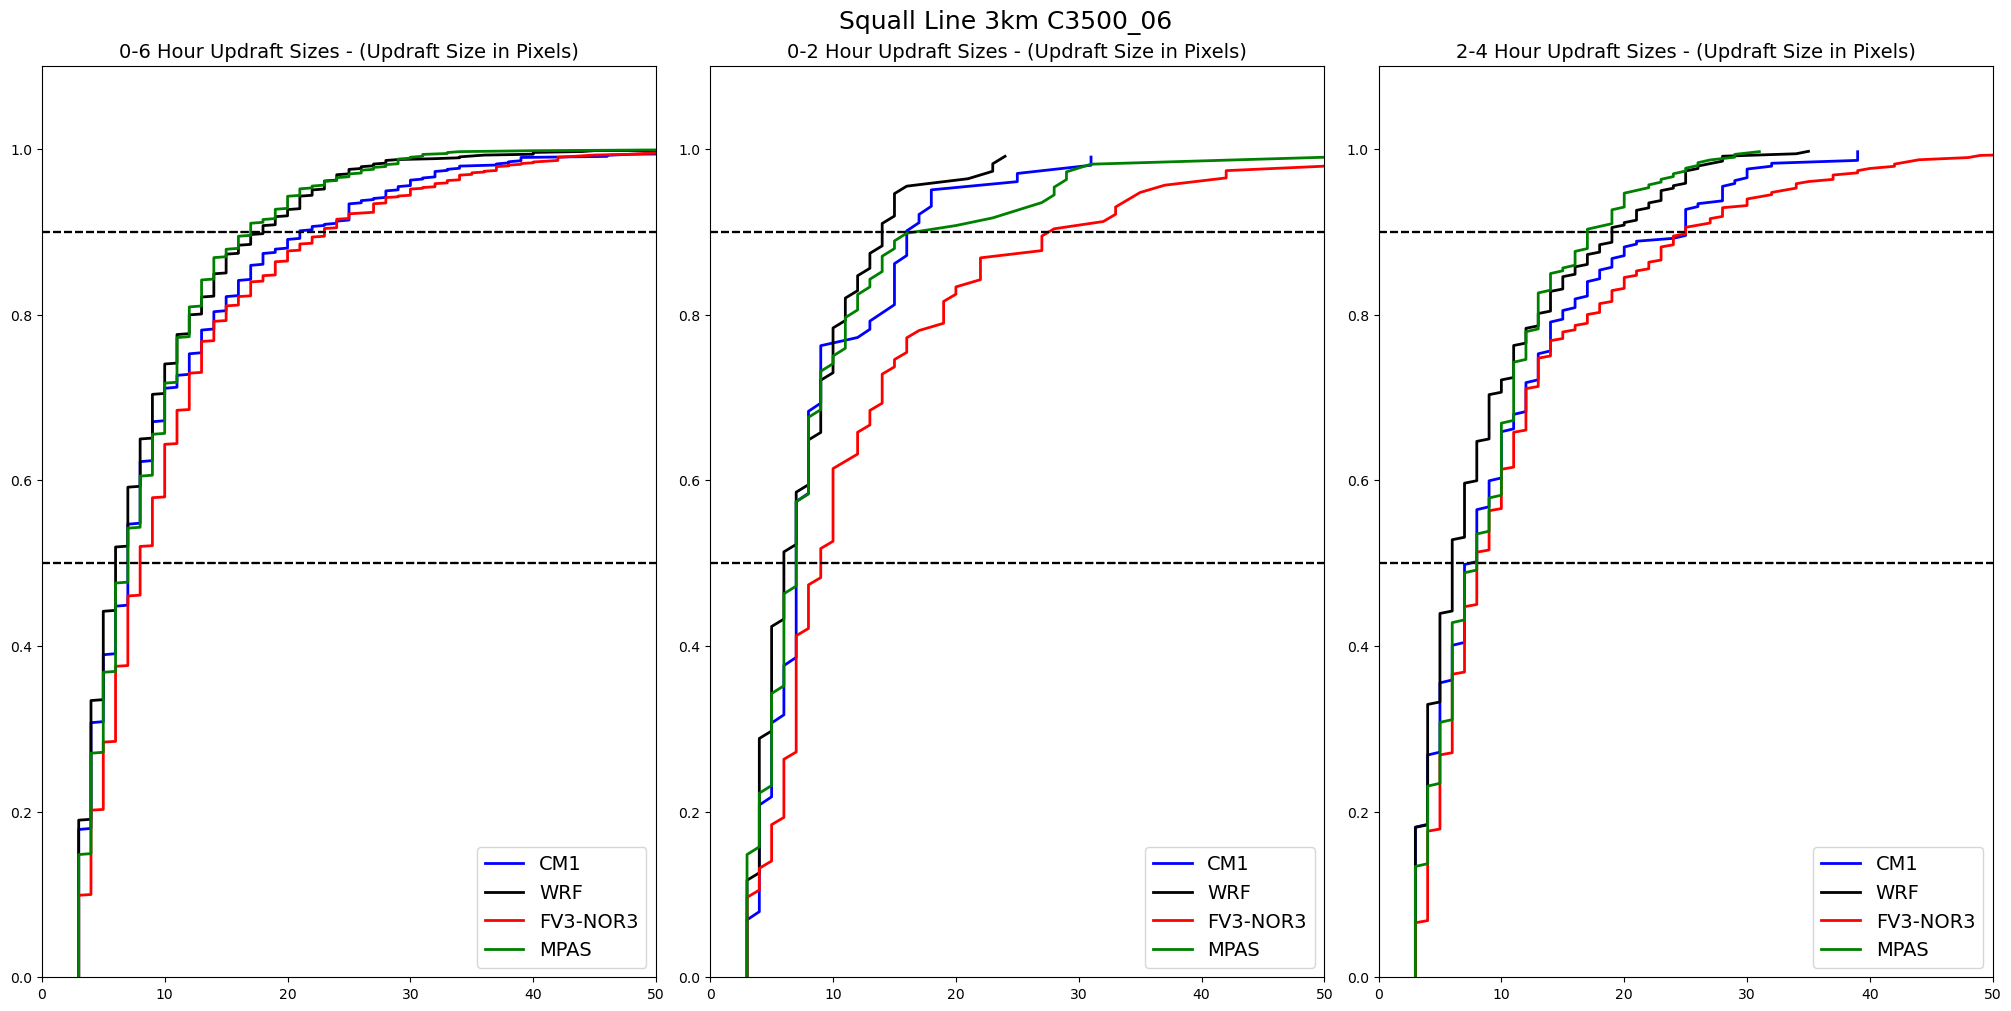

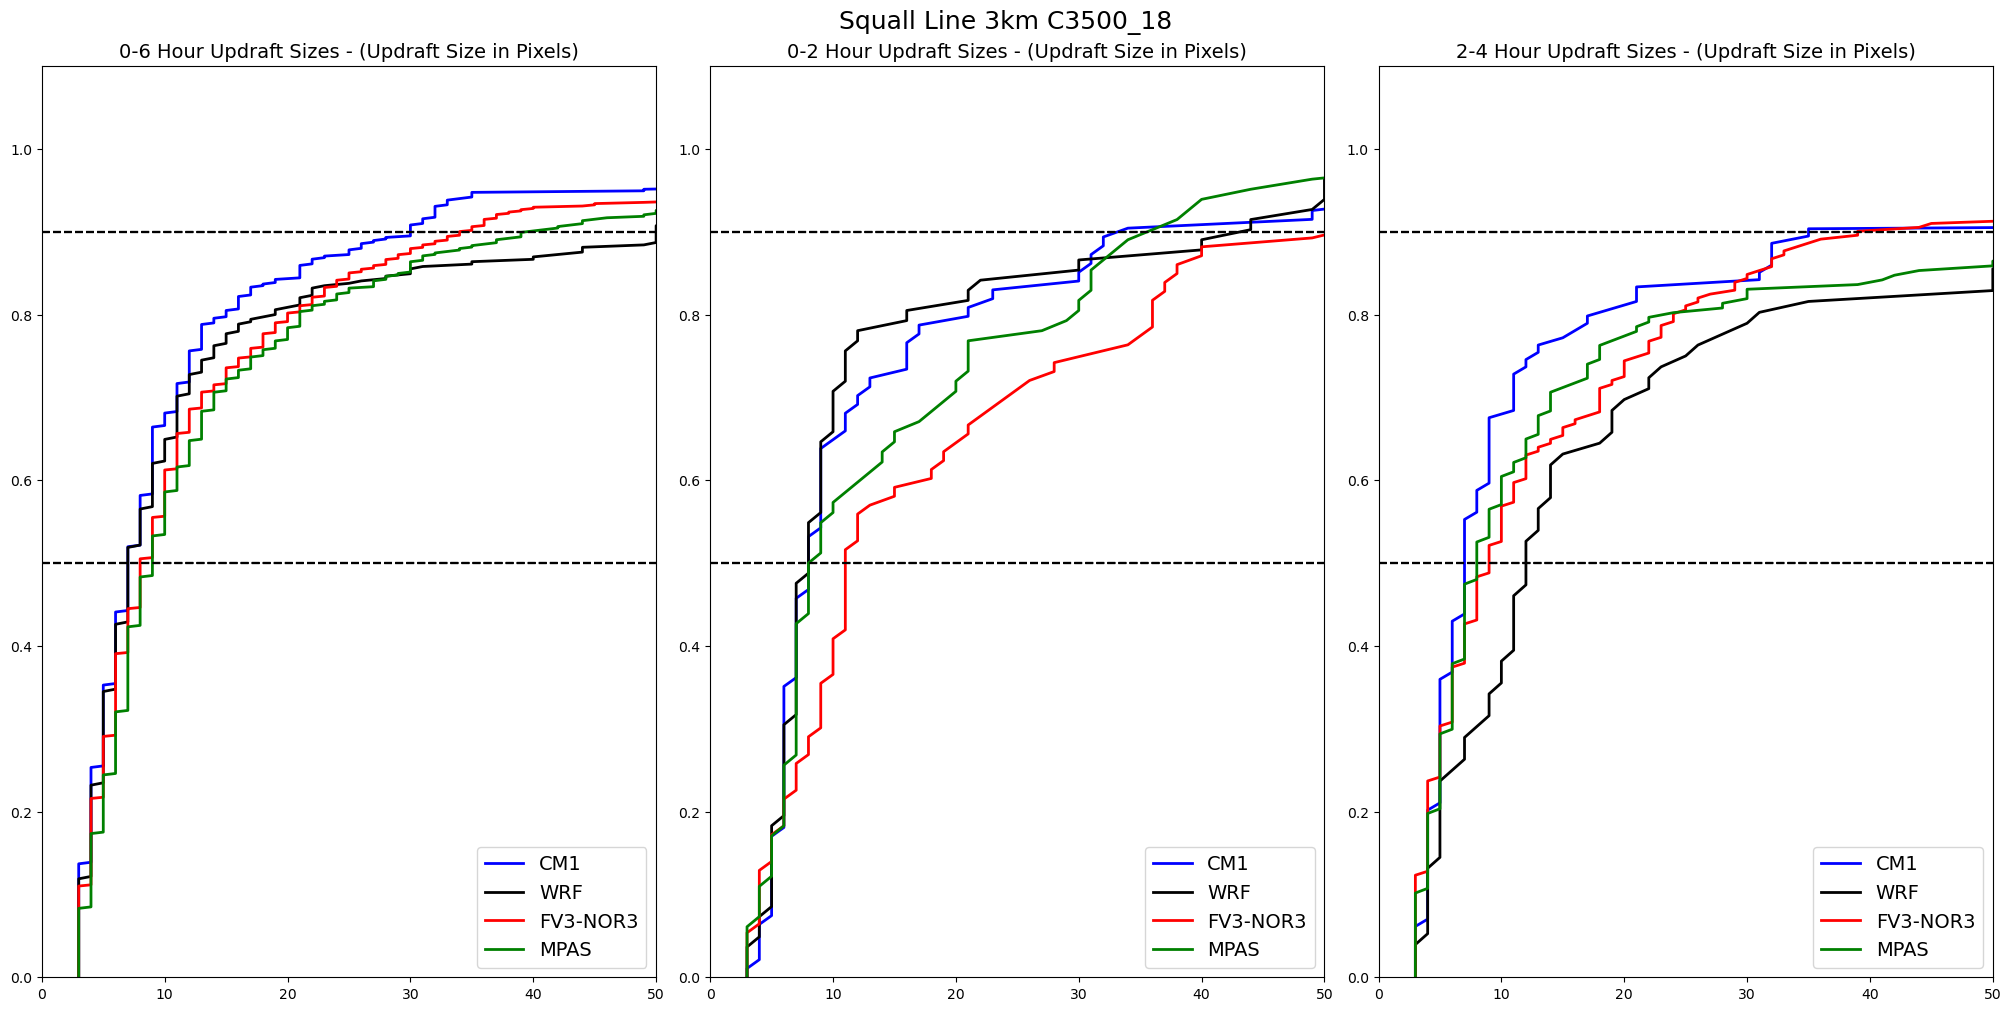

In [68]:

# models = { 'cm1': pickle2Obj('profiles/cm1_squall_3km_3pix.pkl',retObj=False),
#            'wrf': pickle2Obj('profiles/wrf_squall_3km_3pix.pkl', retObj=False),
#            'solo': pickle2Obj('profiles/solo_squall_3km_3pix.pkl',retObj=False),
#            'mpas': pickle2Obj('profiles/mpas_squall_3km_L2_3pix.pkl',retObj=False),
#            # 'solo2': pickle2Obj('profiles/solo_squall_3km_nord2_35dbz_profiles.pkl',retObj=False),
#            # 'solo1': pickle2Obj('profiles/solo_squall_3km_nord1_35dbz_profiles.pkl',retObj=False) 
#          }

plot_sizes_driver(models, plabel = 'Squall Line 3km' )

# models = { 'cm1': pickle2Obj('profiles/cm1_squall_3km_35dbz_profiles.pkl',retObj=False),
#            'wrf': pickle2Obj('profiles/wrf_squall_3km_35dbz_profiles.pkl', retObj=False),
#            'solo': pickle2Obj('profiles/solo_squall_3km_35dbz_profiles.pkl',retObj=False),
#            # 'solo2': pickle2Obj('profiles/solo_squall_3km_nord2_35dbz_profiles.pkl',retObj=False),
#            # 'solo1': pickle2Obj('profiles/solo_squall_3km_nord1_35dbz_profiles.pkl',retObj=False) 
#          }

# models = { 'cm1': pickle2Obj('profiles/solo_squall_3km_27Apr.pkl',retObj=False),
#            'solo': pickle2Obj('profiles/solo_squall_3km_35dbz_profiles.pkl',retObj=False),
#            # 'solo2': pickle2Obj('profiles/solo_squall_3km_nord2_35dbz_profiles.pkl',retObj=False),
#            # 'solo1': pickle2Obj('profiles/solo_squall_3km_nord1_35dbz_profiles.pkl',retObj=False) 
#          }
            
# plot_sizes_driver( models, plabel = 'squall_comparison' )


In [2]:
#----------------------------------------------------
def plot_distribution(models, var='dbz', xlim = [0.,70.], thres=0.0, plabel=""):
    
    titles = ["0-6 Hour %s" % var.upper(), "0-2 Hour %s" % var.upper(), "2-6 Hour %s" % var.upper()]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18",)
    
    step = [[0,-1], [0,8],[8,24]]

    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
            
            for key in models:
                
                mdata = models[key]

                for n, s in enumerate(step):
                    
                    data = mdata[label][var][s[0]:s[1]].flatten()
                    data = data[data > thres]

                    ss = np.sort(data)

                    zhgt = np.arange(len(ss))/float(len(ss))

                    if key == 'solo':
                        ax[n].plot(ss, zhgt, color='r', label='FV3 - %d' % len(ss), linewidth=2.0)
                        
                    if key == 'solo2':
                        ax[n].plot(ss, zhgt, color='g', label='FV3-NOR2 - %d' % len(ss), linewidth=2.0, linestyle='--')
                
                    if key == 'solo1':
                        ax[n].plot(ss, zhgt, color='g', label='FV3-NOR1 - %d' % len(ss), linewidth=2.0, linestyle='-')
                        
                    if key == 'cm1':
                        ax[n].plot(ss, zhgt, color='b', label='CM1 - %d' % len(ss), linewidth=2.0)
                    
                    if key == 'wrf':
                        ax[n].plot(ss, zhgt, color='k', label='WRF - %d' % len(ss), linewidth=2.0)
                    
                    if key == 'mpas':
                        ax[n].plot(ss, zhgt, color='g', label='MPAS - %d' % len(ss), linewidth=2.0)

                    ax[n].set_title("%s " % (titles[n]), fontsize=20)
                    ax[n].axhline(y=0.5, color='k', linestyle='--')
                    ax[n].axhline(y=0.9,  color='k', linestyle='--')
                    ax[n].axvline(x=35.,  color='k', linestyle='--')

                    ax[n].set_ylim(0.0,1.1)
                    ax[n].set_xlim(xlim)
                    ax[n].legend(fontsize=20, loc='lower right')
            
            plt.suptitle("%s %s " % (plabel, label), fontsize=18)
            
            plt.savefig("Cumulative_Histo_%s_%s.png" % (var.upper(),label))
            

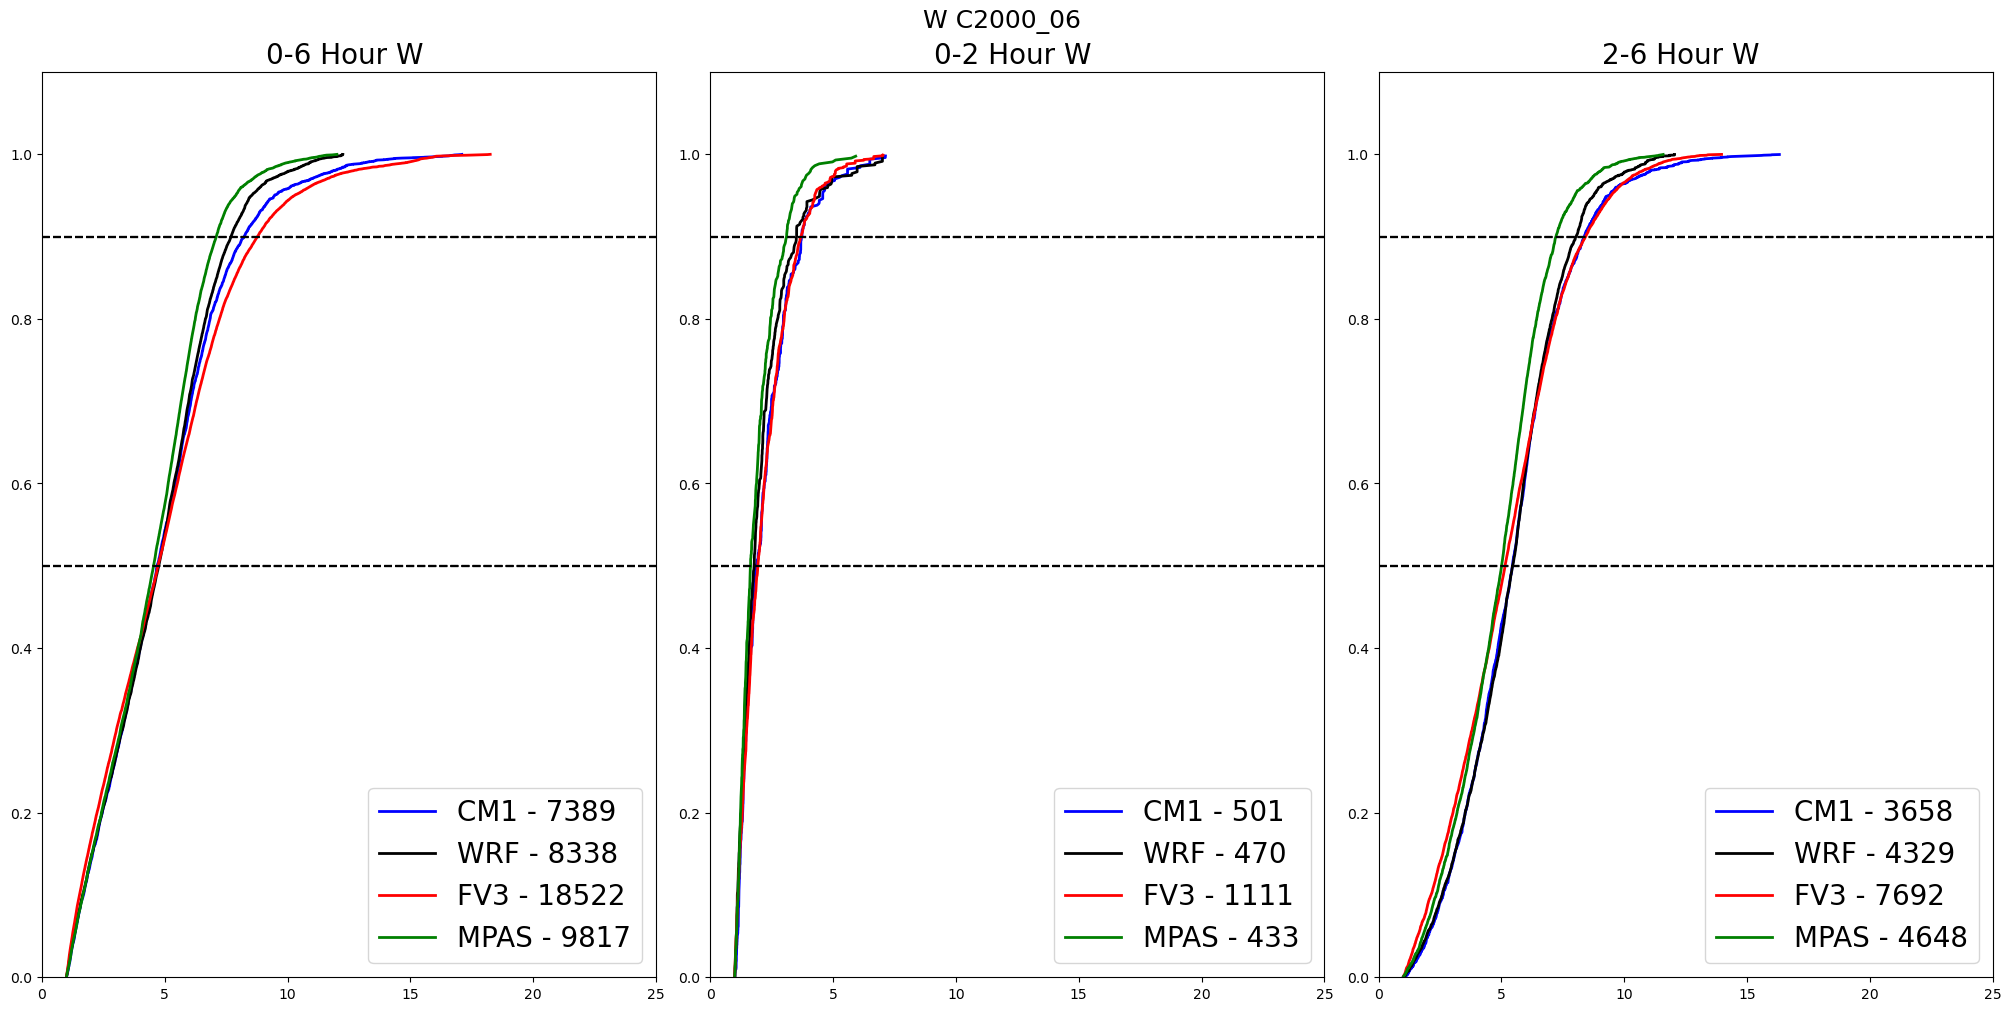

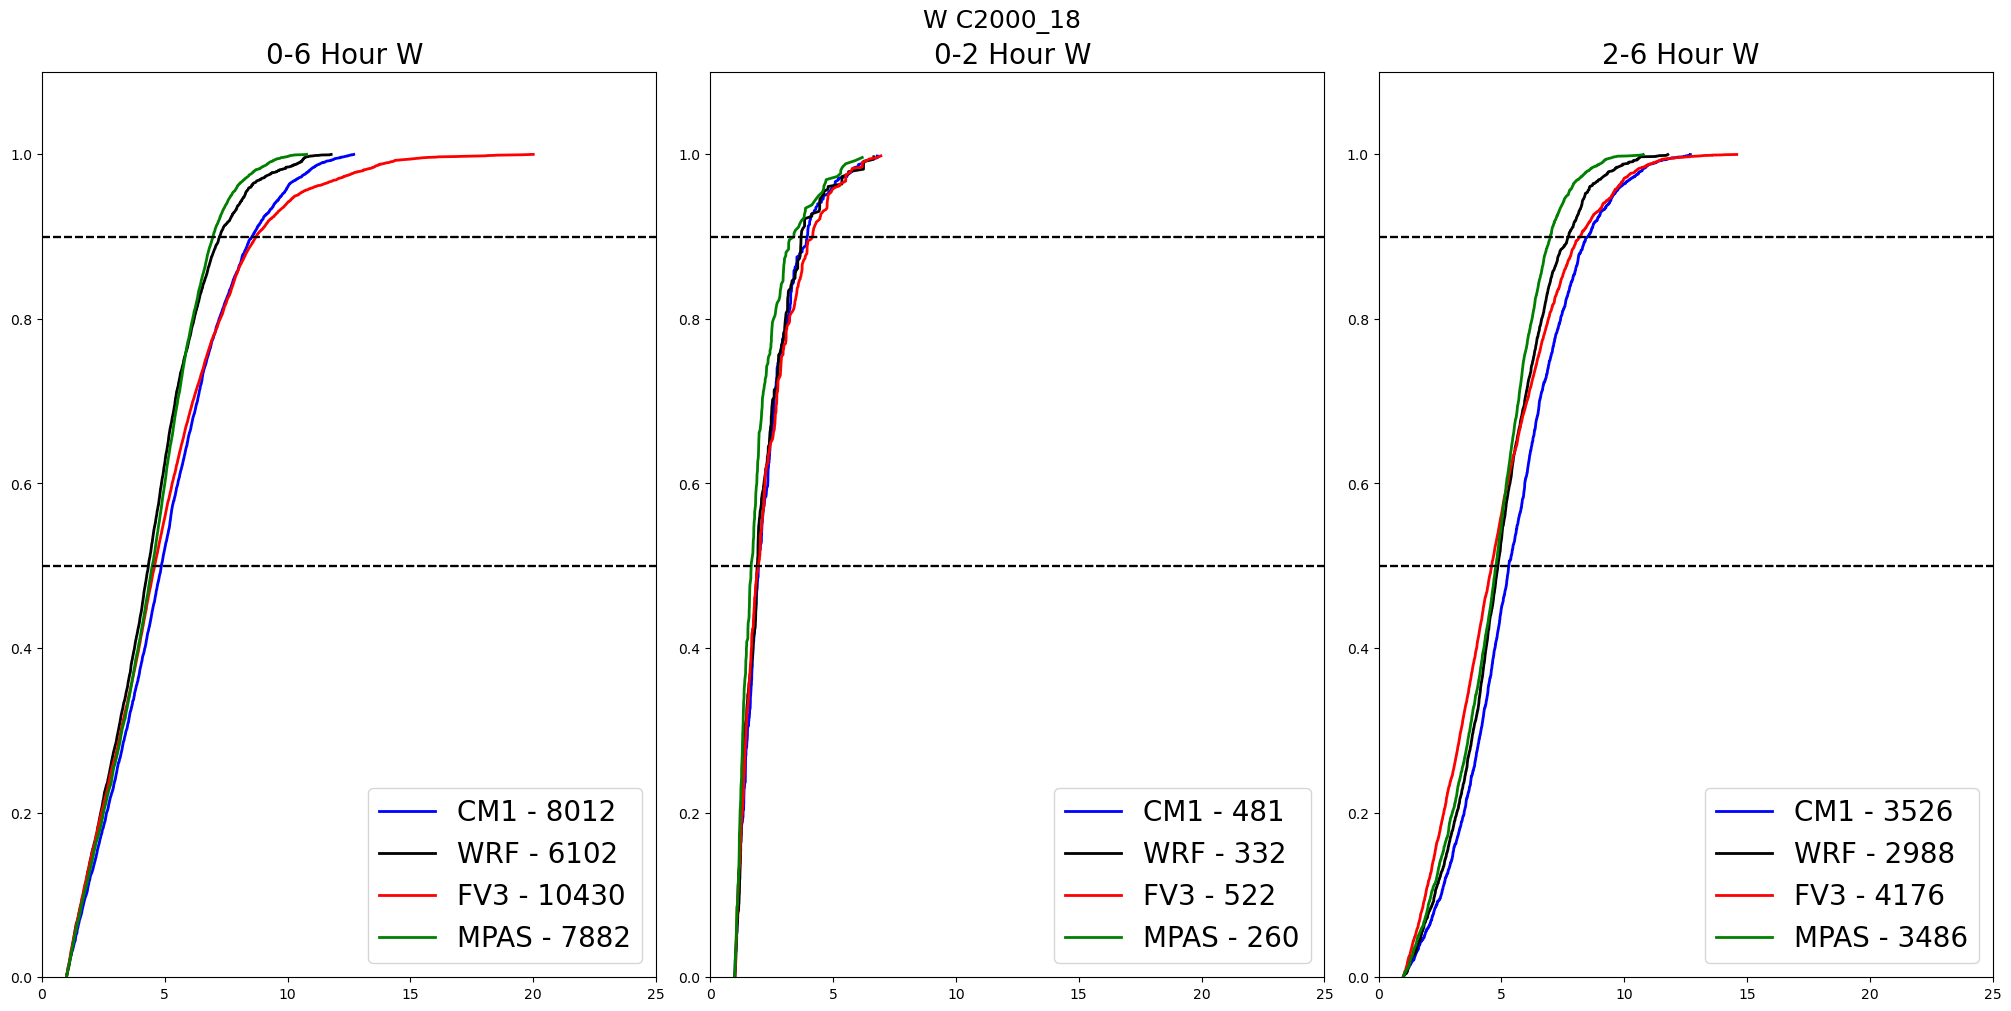

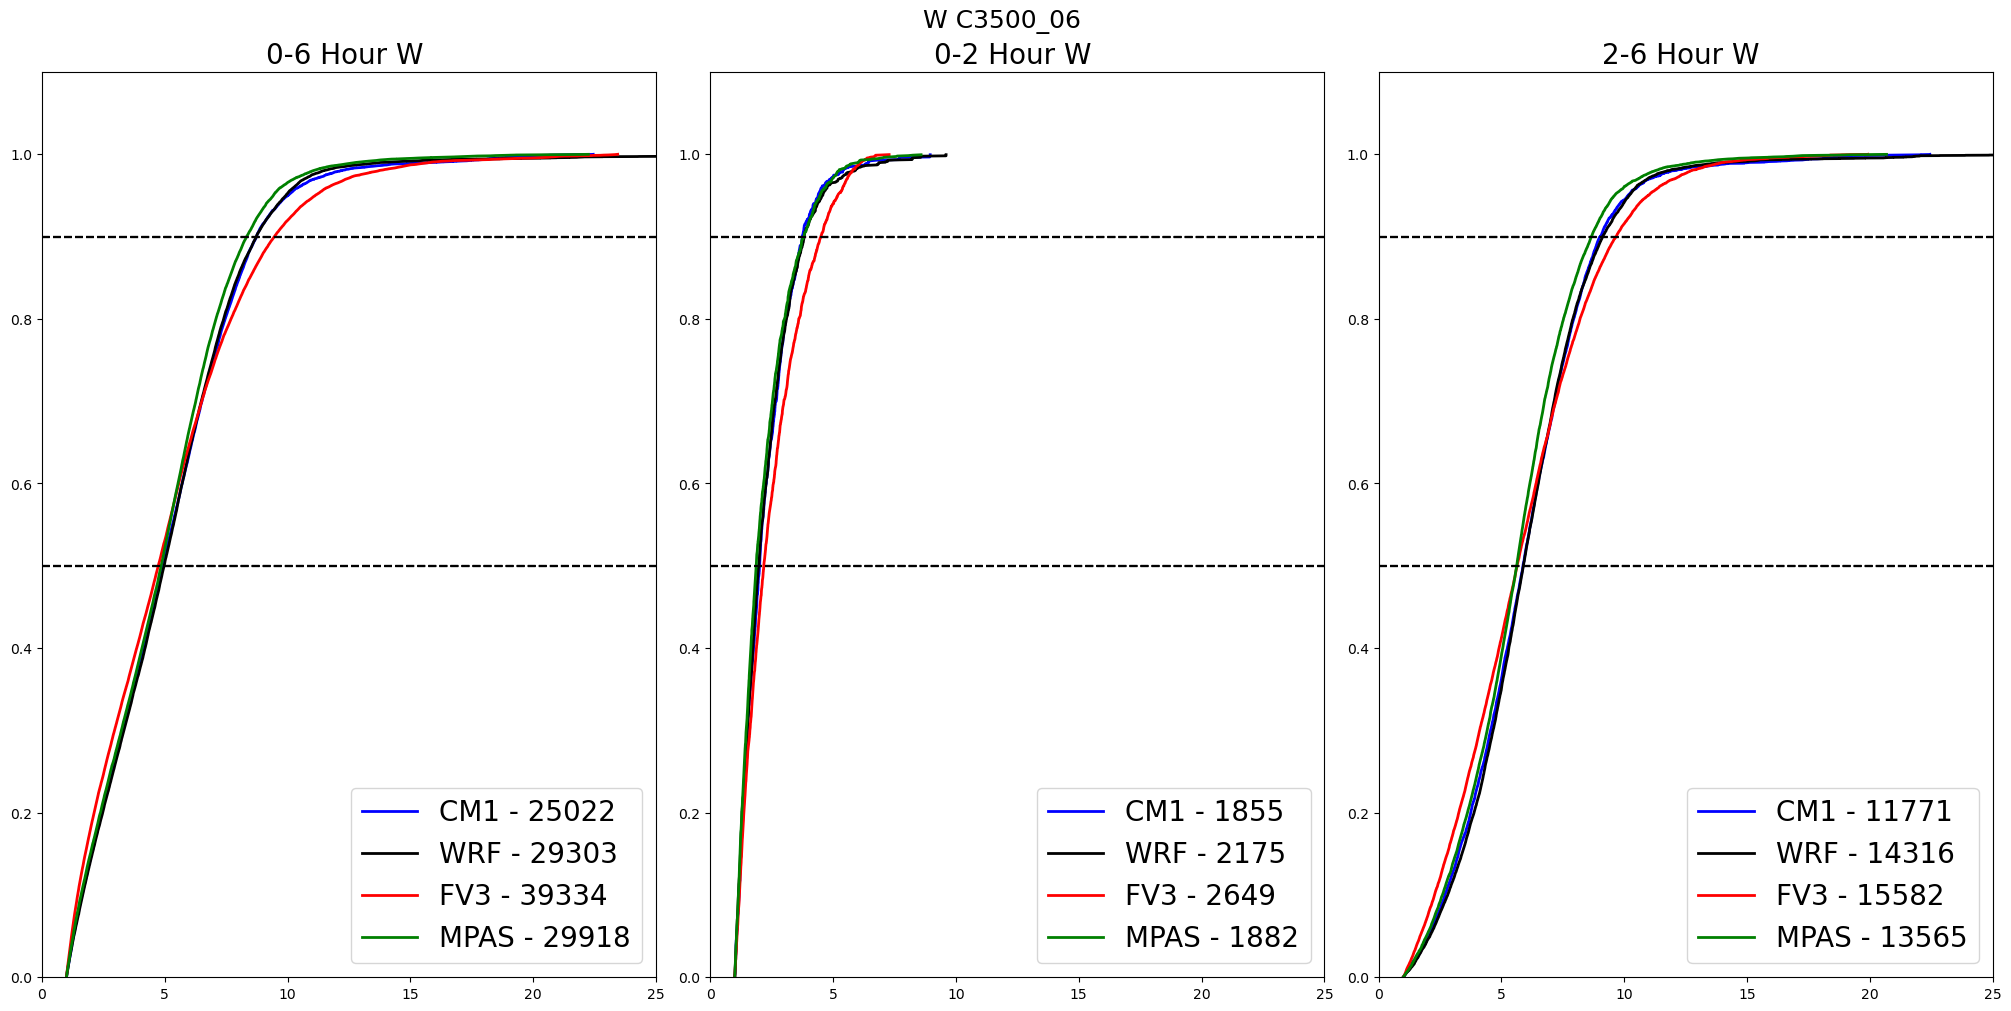

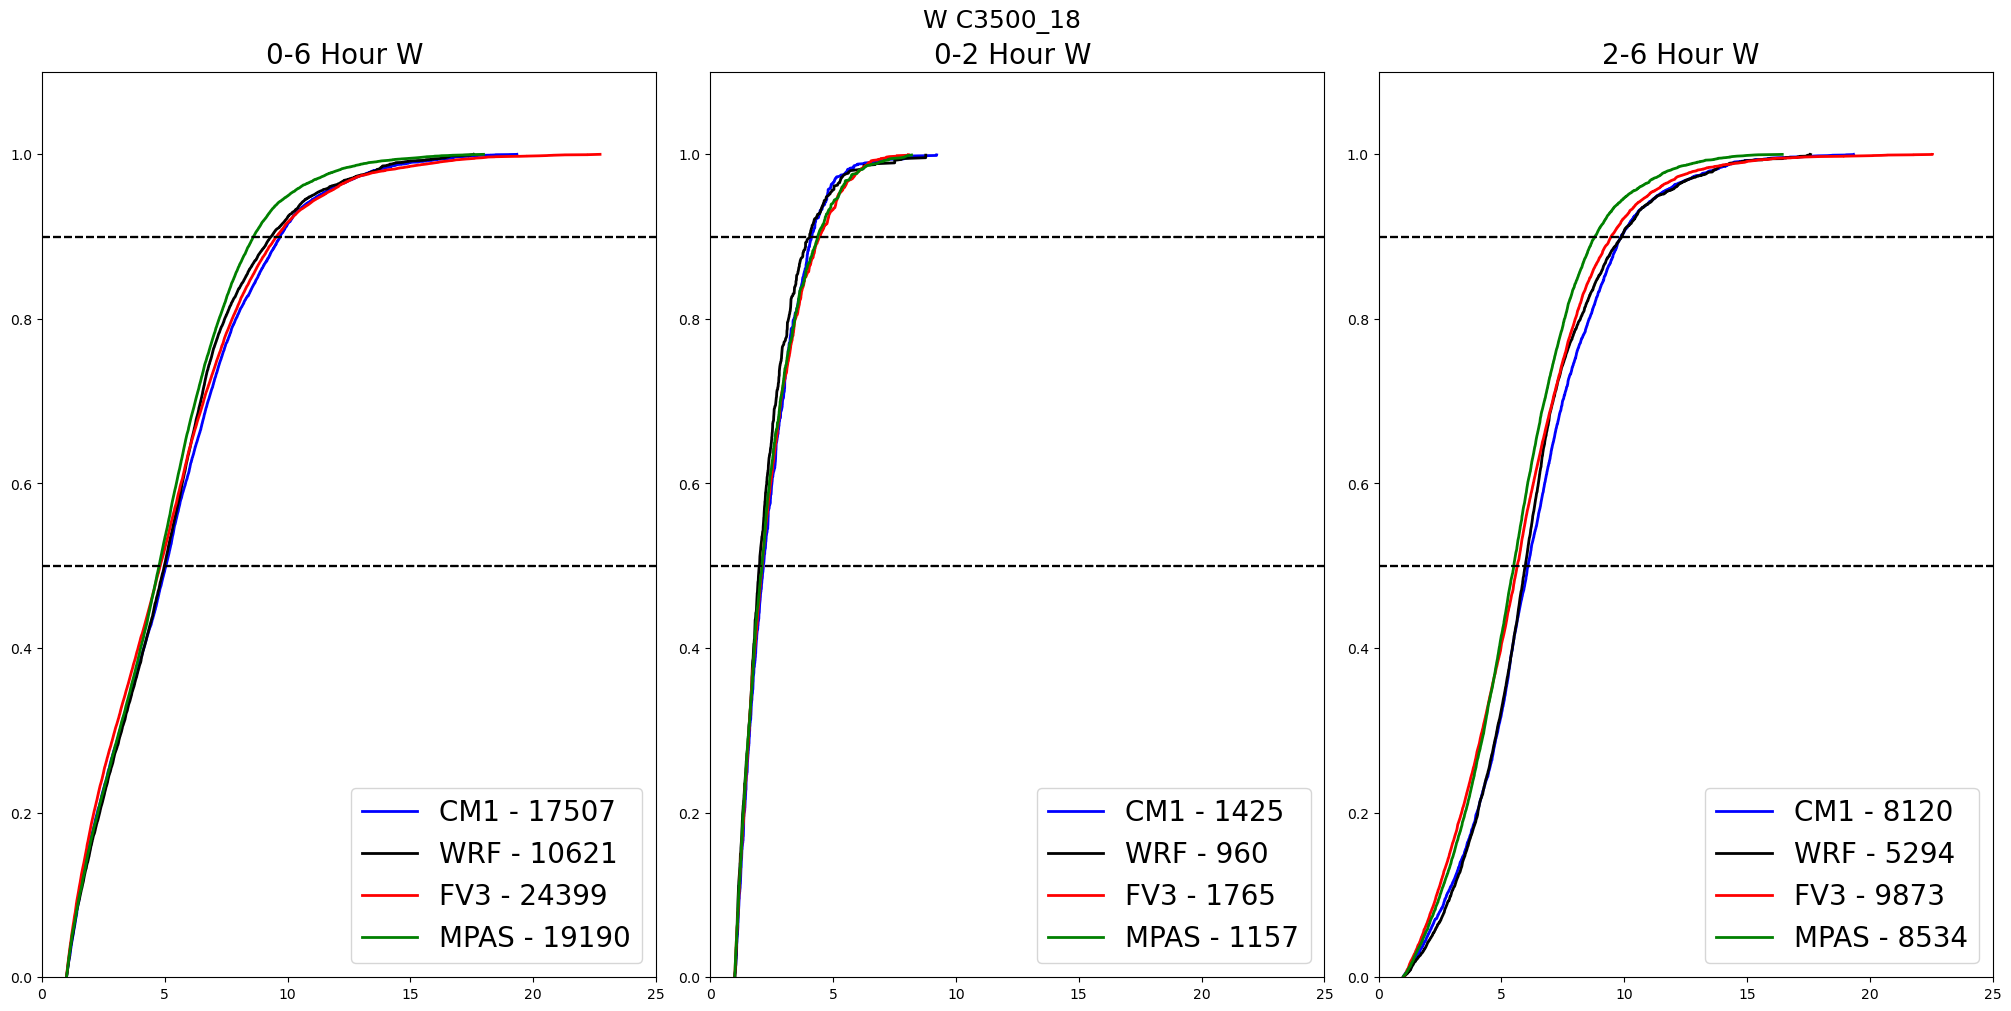

In [30]:
plot_distribution( models, var='w', thres=1.0, xlim=[0.0, 25.], plabel = 'W' )

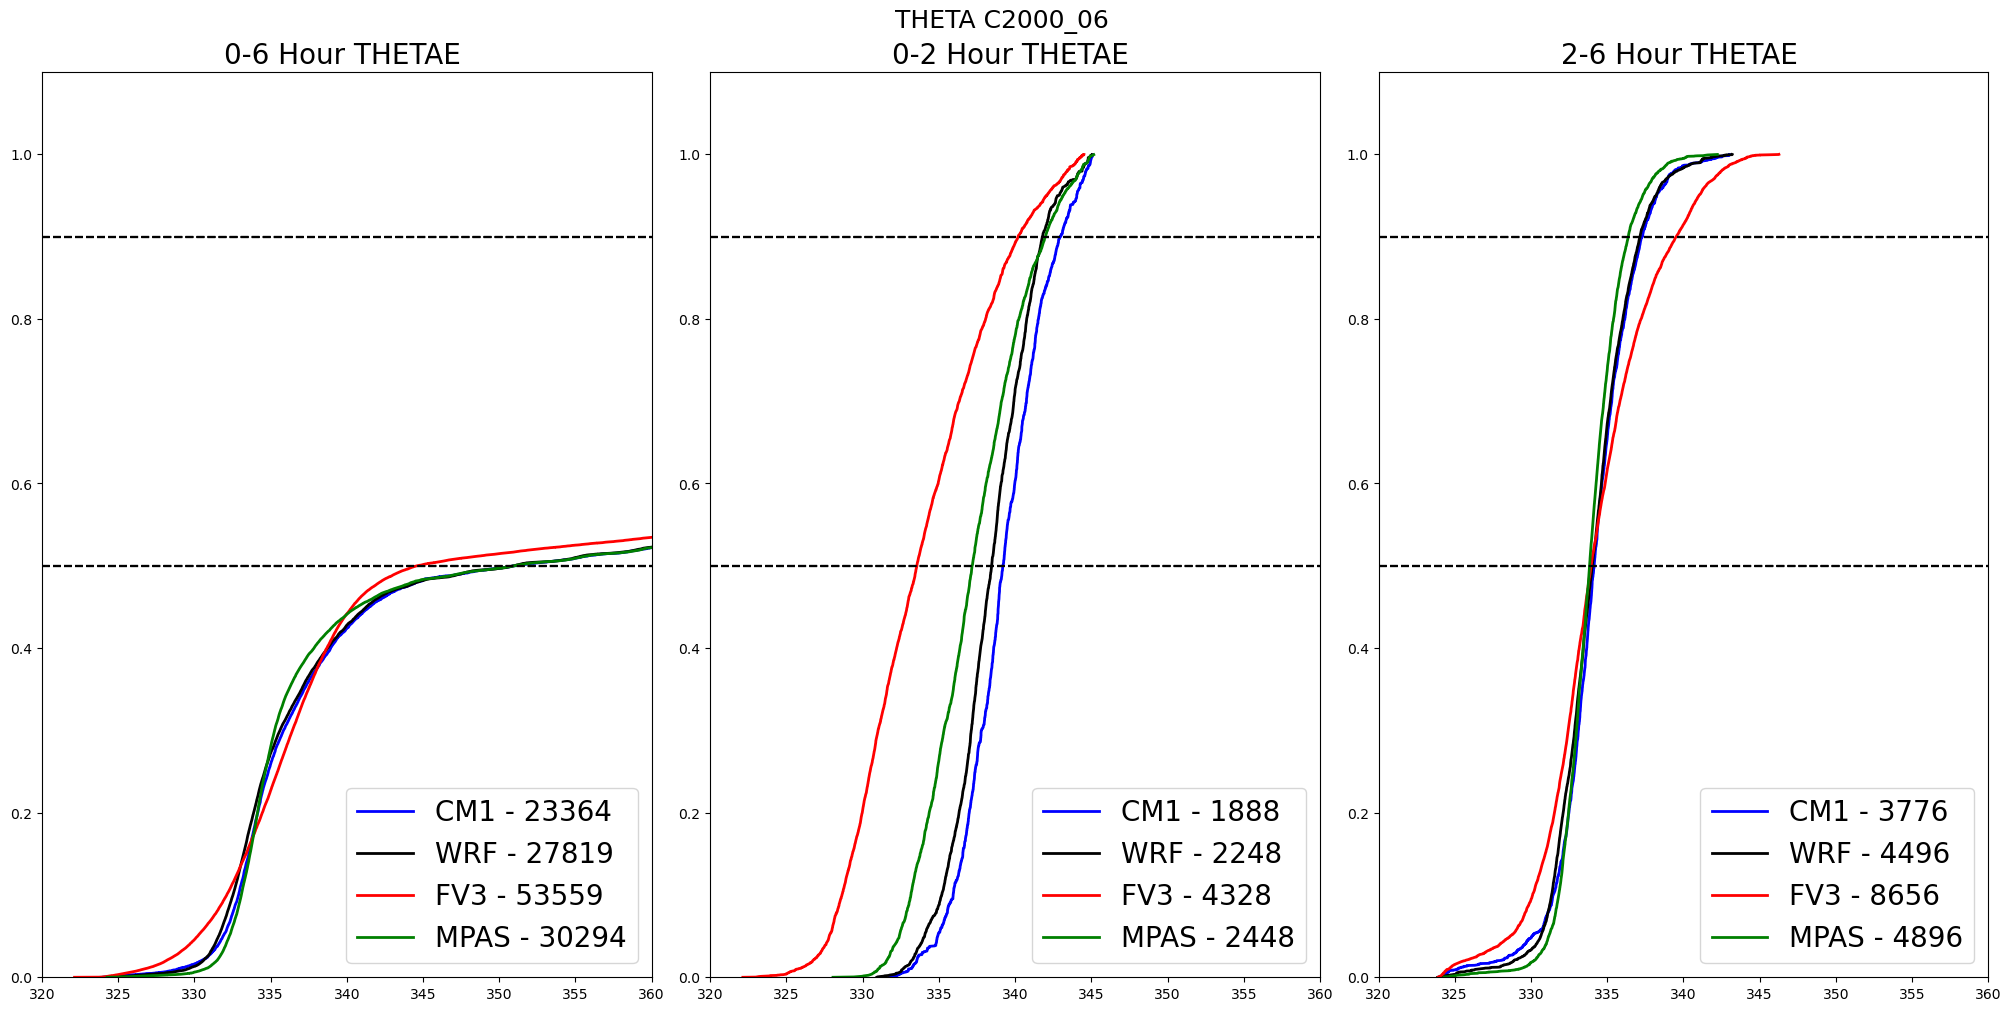

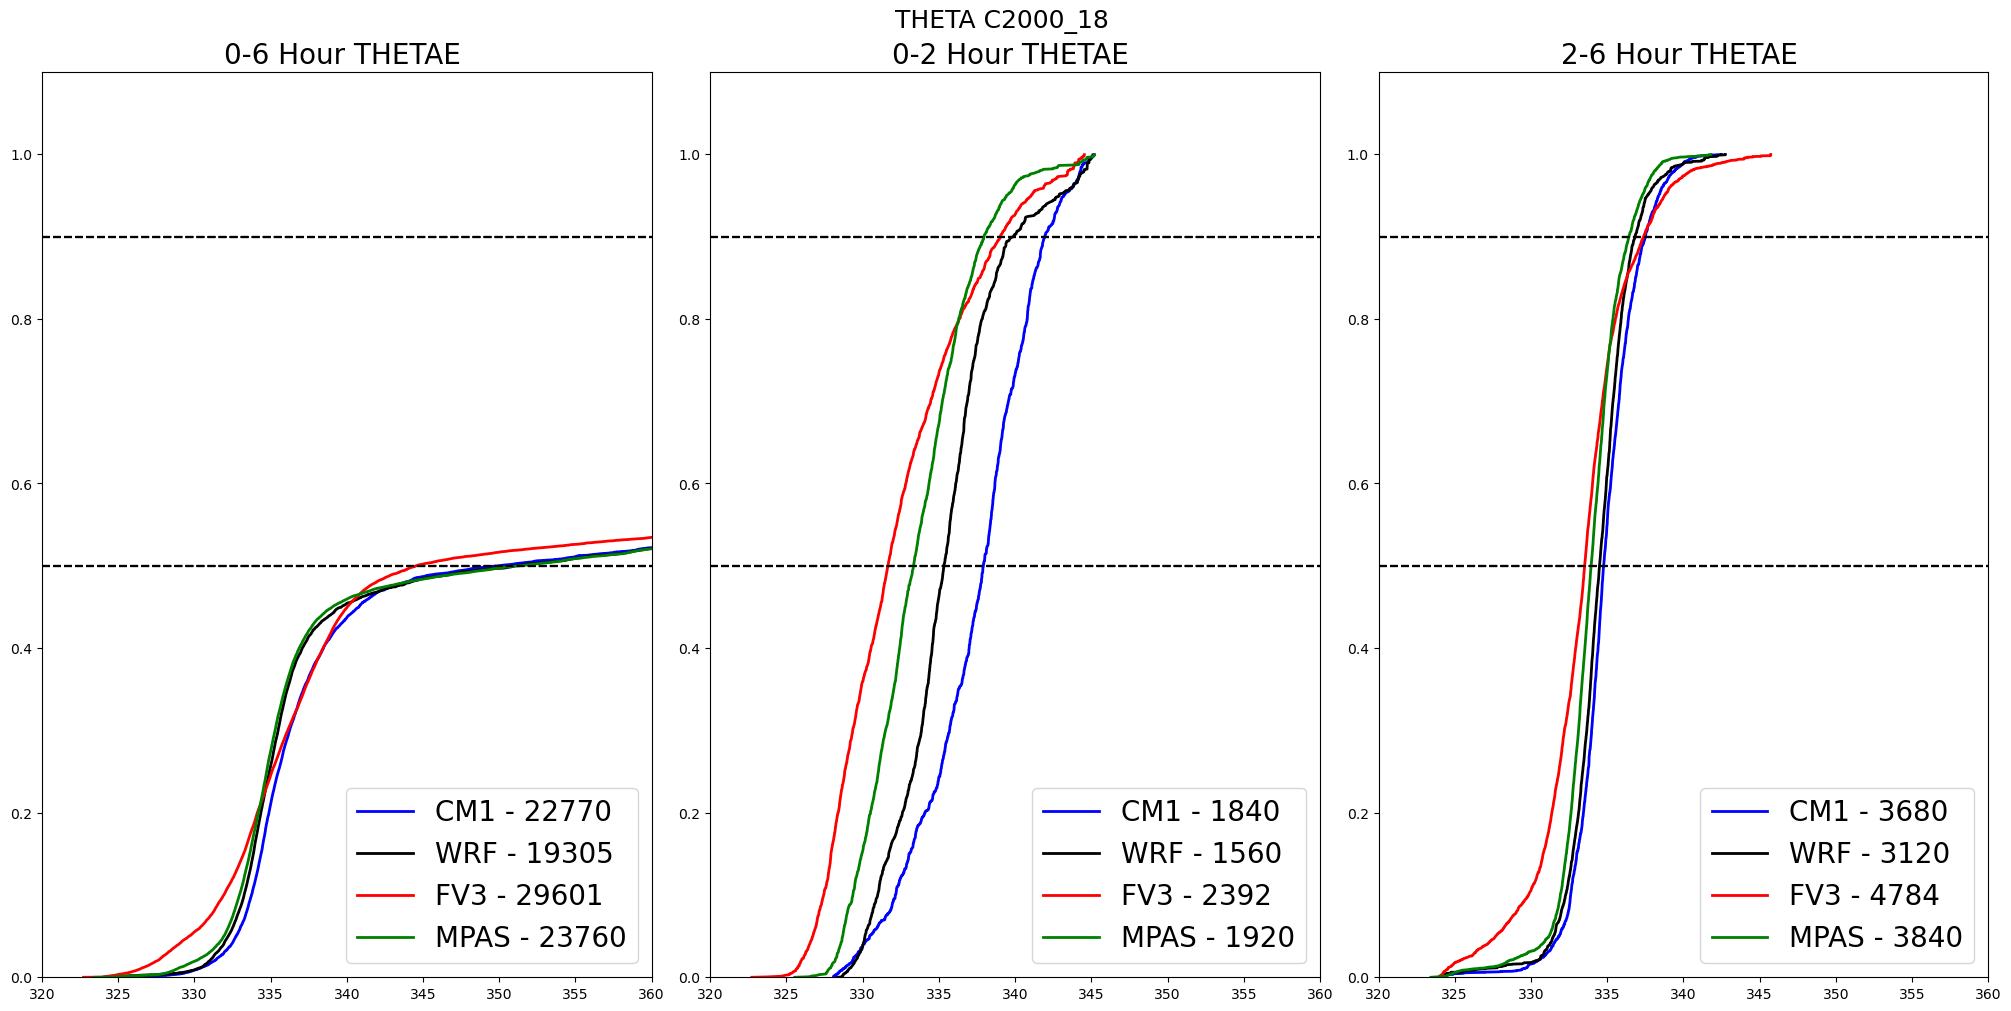

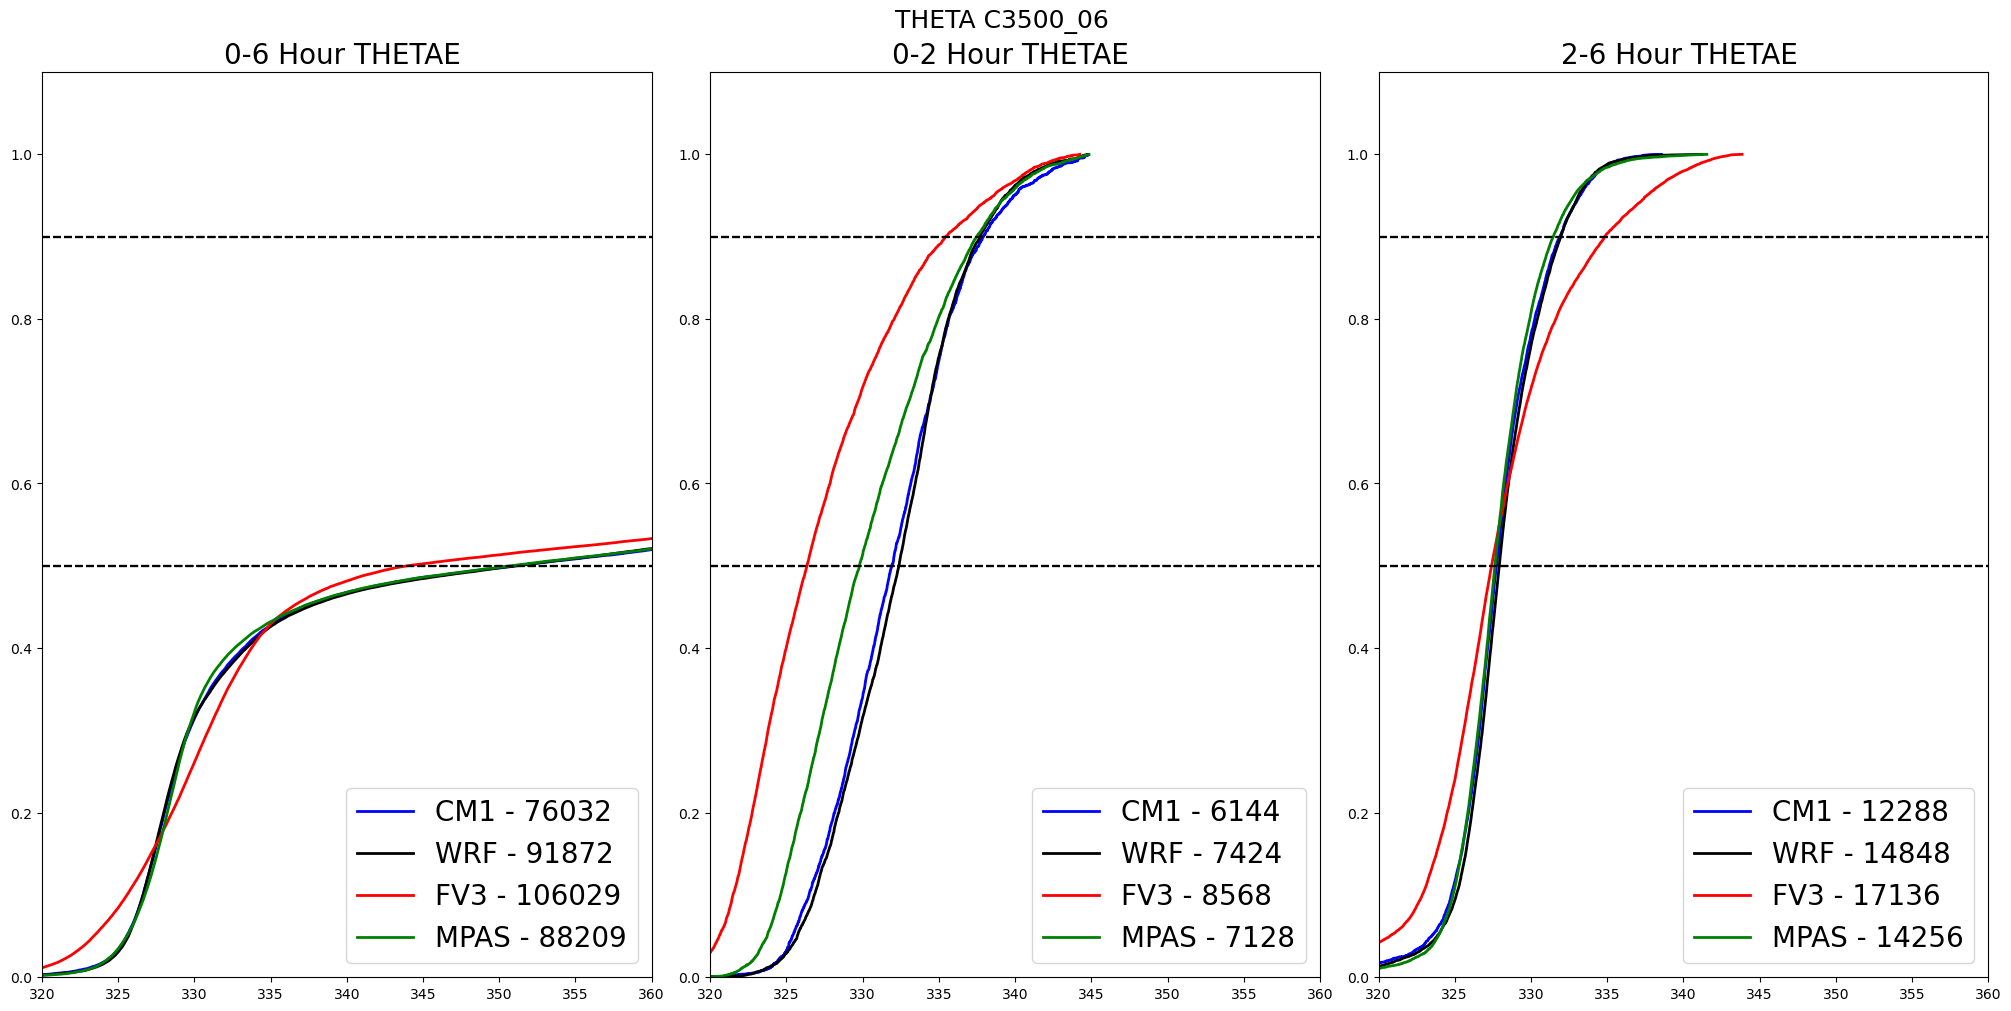

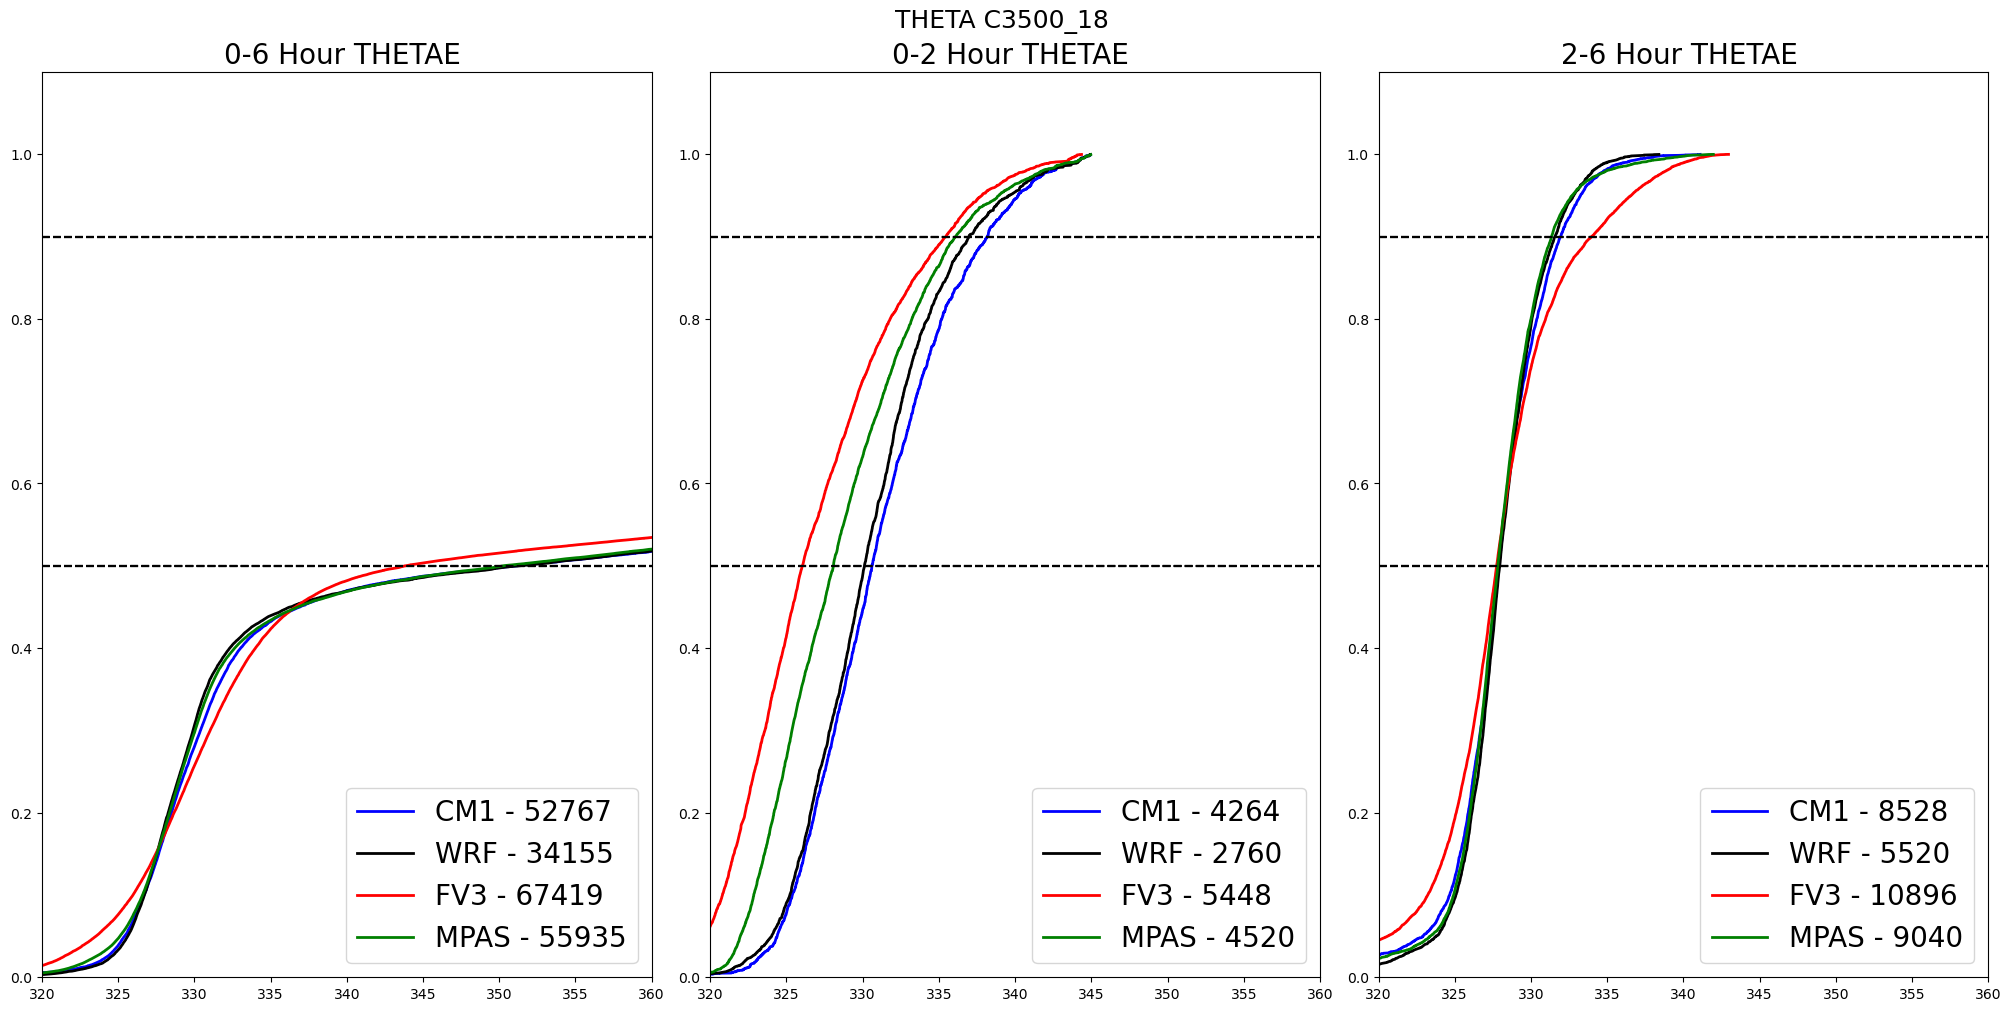

In [9]:
plot_distribution( models, var='thetae', thres=300., xlim=[320., 360.], plabel = 'THETA') 

In [3]:
plot_distribution( models, var='buoy', thres=0.01, xlim=[0.0, .4], plabel = 'BUOY' )

NameError: name 'models' is not defined

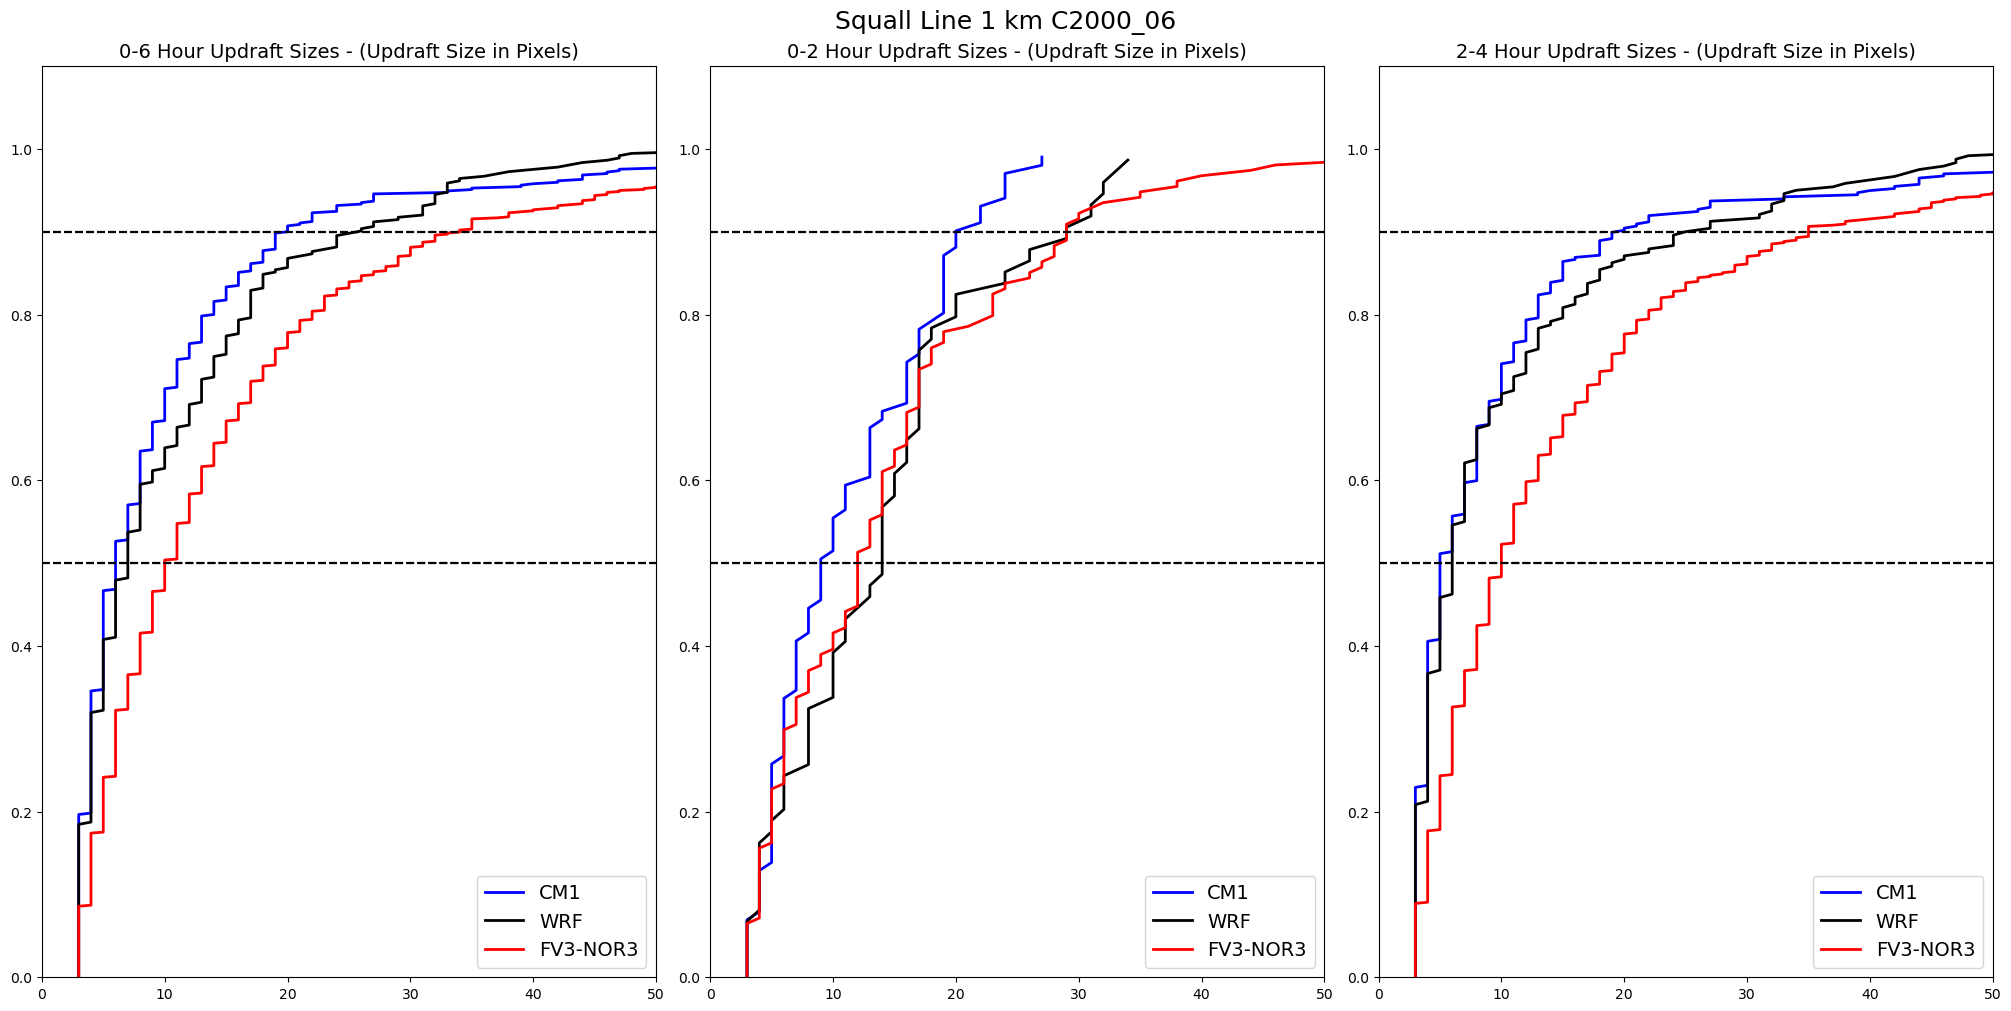

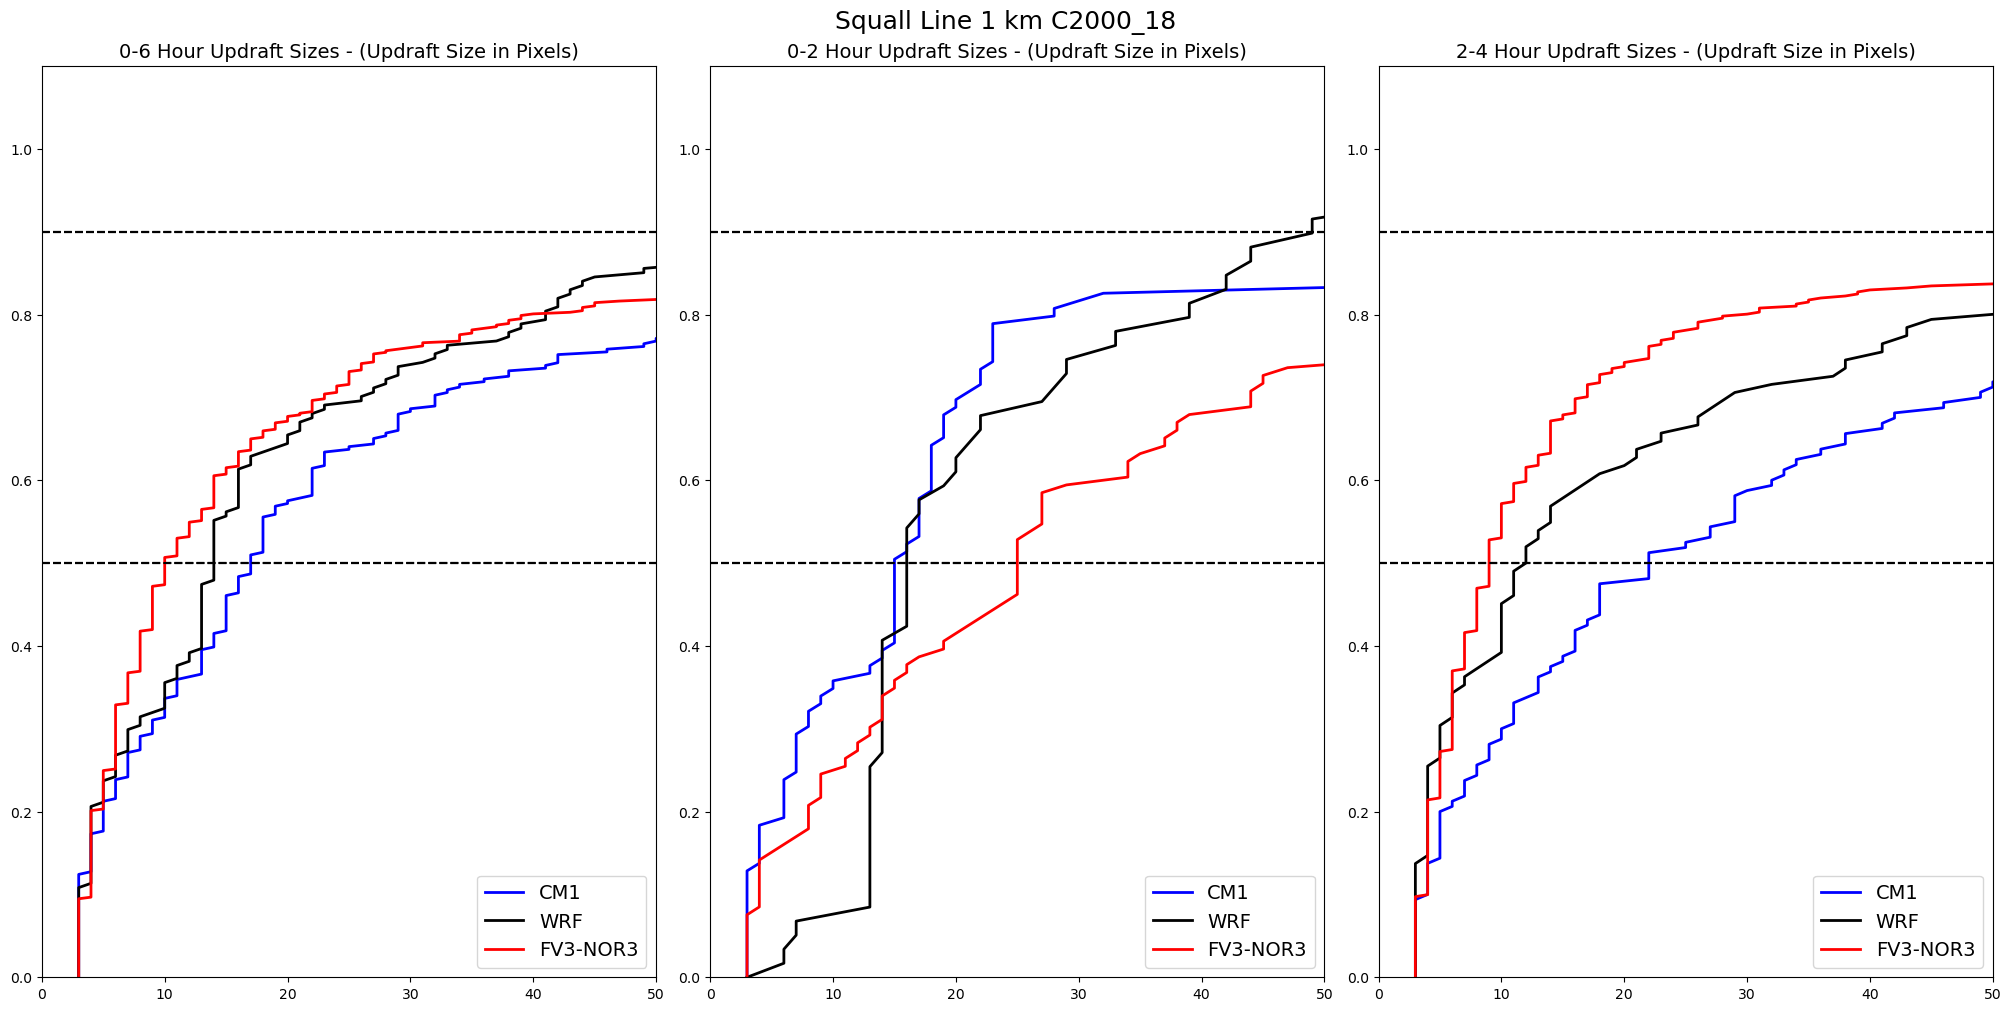

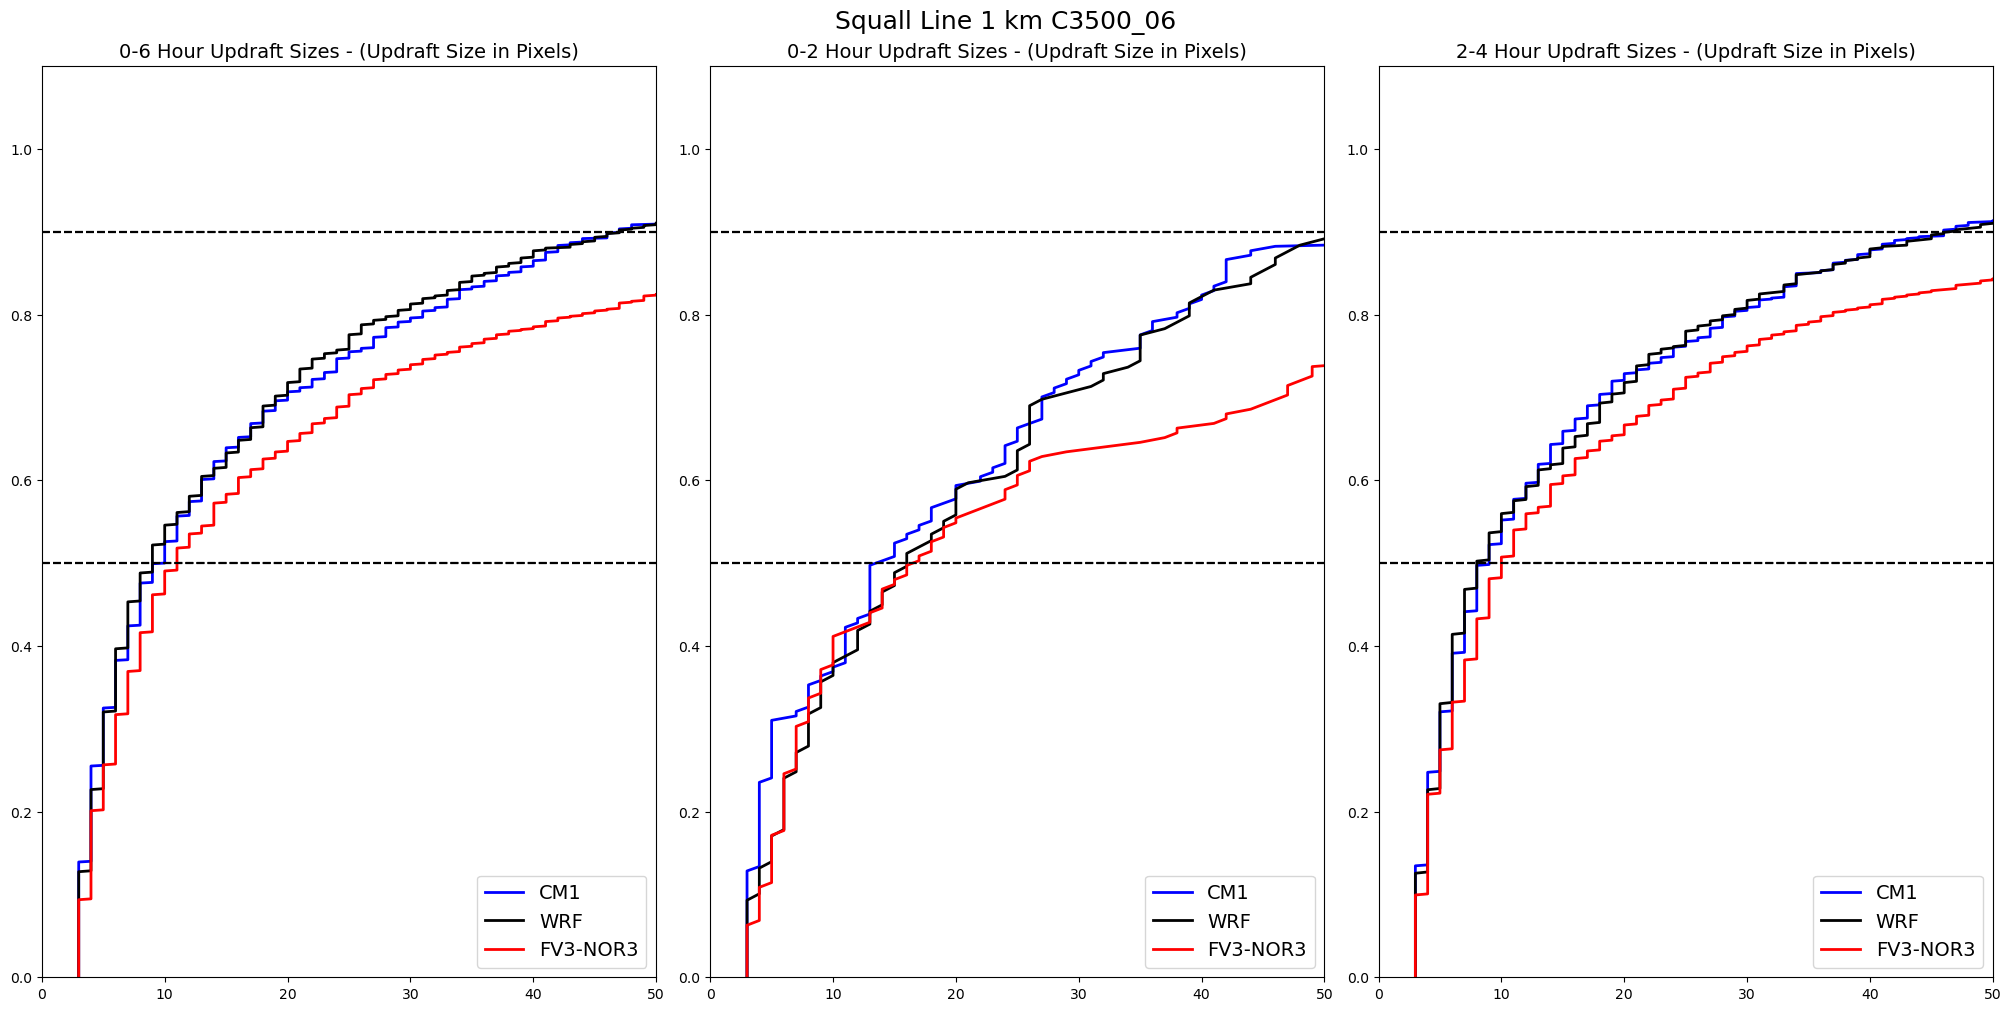

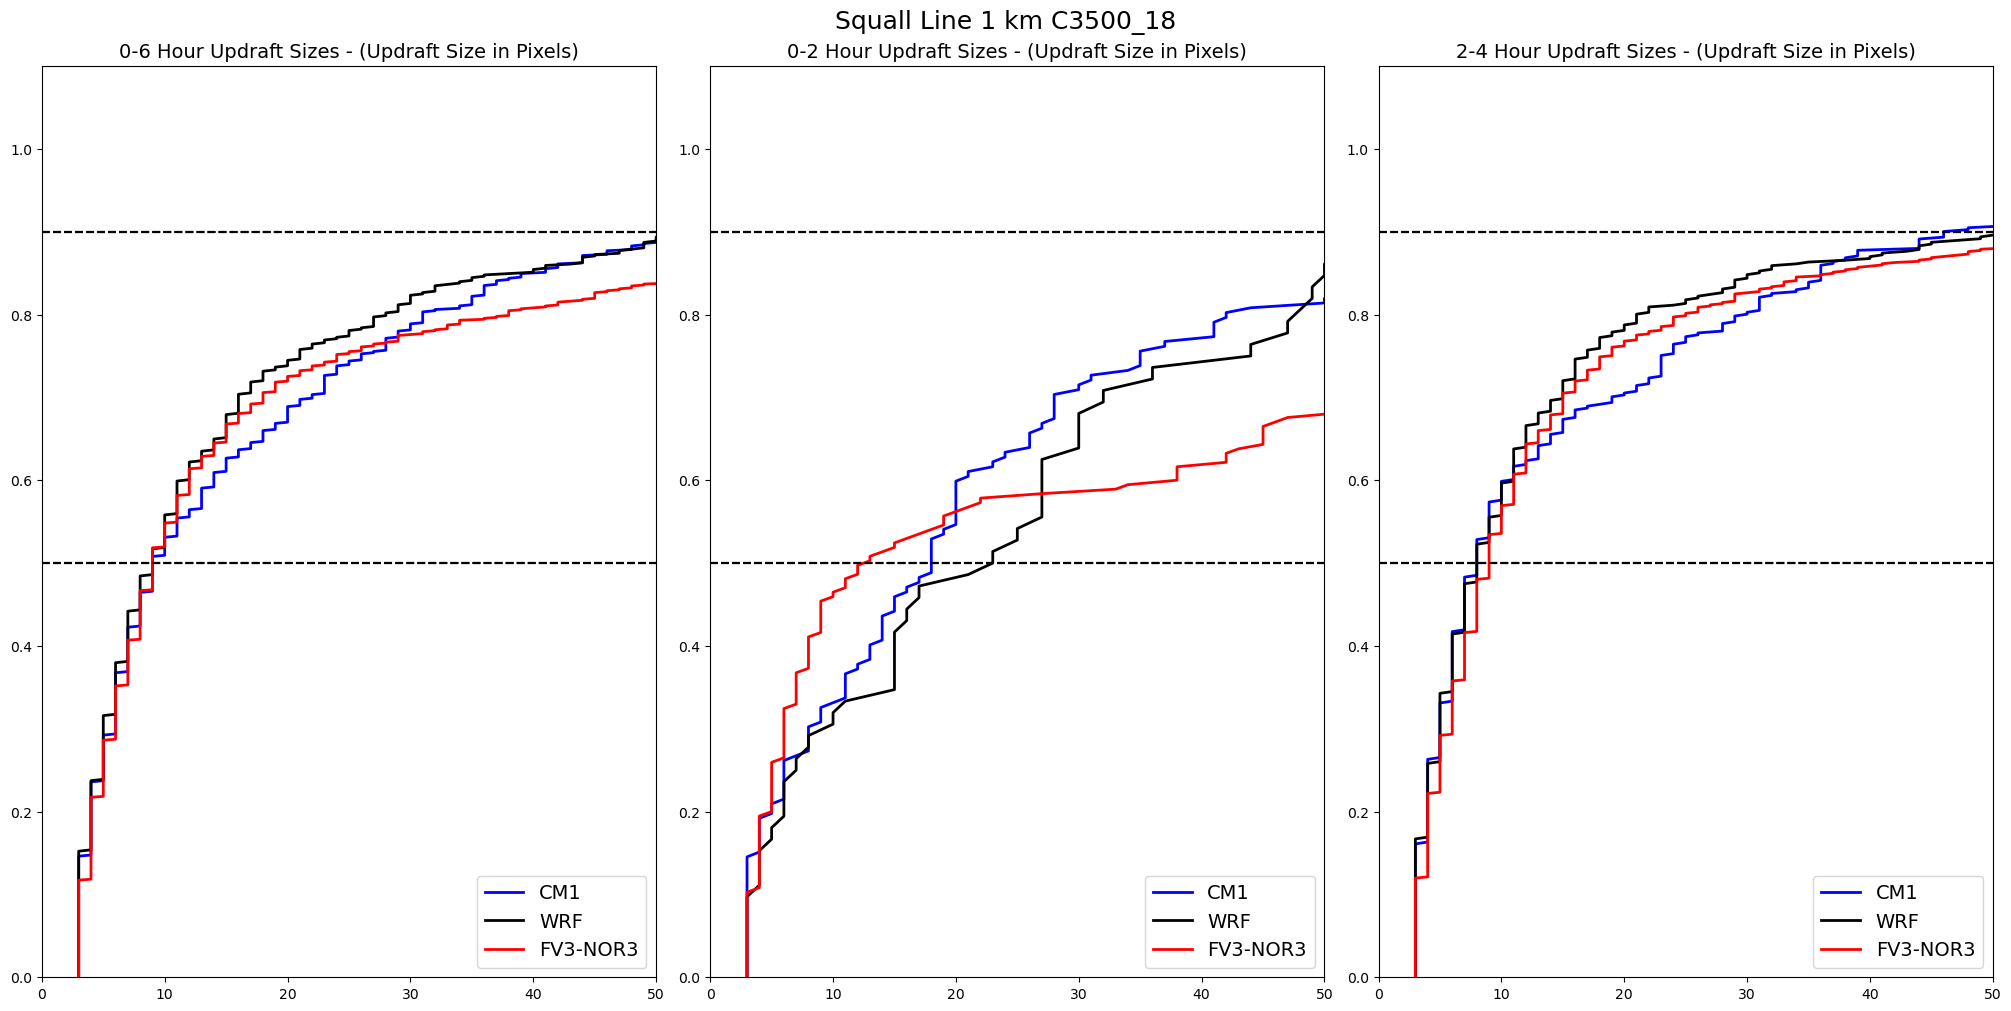

In [69]:
models = { 'cm1': pickle2Obj('profiles/cm1_squall_1km_35dbz.pkl',retObj=False),
           'wrf': pickle2Obj('profiles/wrf_squall_1km_35dbz.pkl', retObj=False),
           'solo': pickle2Obj('profiles/solo_squall_1km_35dbz.pkl',retObj=False)}
            
plot_sizes_driver( models, plabel = 'Squall Line 1 km' )

In [ ]:
#--------------------------------------------------------------------------------------------
# define w / t / theta plotting

def plot_wptpth_driver(cm1, wrf, fv3, plabel = ""):

    titles = ["Updraft Profiles", "Pert. Temp Profiles", "Pert. Pressure (Pa) Profiles"]

    xvert  = [6.0, 8.0, 12.5]
    xlim   = [8., 15.0, 20.0]

    zhgts = 250. + 250.*np.arange(100)

    allcape = ( "C2000","C3500")
    allshear = ("06", "18")
    
    s = [1,24]
    m = 0

    for cape in allcape:

        label = []

        for shear in allshear:   # create dictionary names

            label.append("%s_%s" % (cape, shear))
        
        fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
        
        for n, variable in enumerate(['w', 'pert_t', 'pert_p']):
                        
            plot_profile(cm1[label[0]], variable, zhgts, m, ax[n], 'b', 'CM1_06', step=s, linewidth=0.5)
            plot_profile(cm1[label[1]], variable, zhgts, m, ax[n], 'b', 'CM1_12', step=s, linewidth=1.0)
            plot_profile(cm1[label[2]], variable, zhgts, m, ax[n], 'b', 'CM1_18', step=s, linewidth=2.0)

            plot_profile(wrf[label[0]], variable, zhgts, m, ax[n], 'k', 'WRF_06', step=s, linewidth=0.5)
            plot_profile(wrf[label[1]], variable, zhgts, m, ax[n], 'k', 'WRF_12', step=s, linewidth=1.0)
            plot_profile(wrf[label[2]], variable, zhgts, m, ax[n], 'k', 'WRF_18', step=s, linewidth=2.0)
                        
            plot_profile(fv3[label[0]], variable, zhgts, m, ax[n], 'r', 'FV3_06', step=s, linewidth=0.5)
            plot_profile(fv3[label[1]], variable, zhgts, m, ax[n], 'r', 'FV3_12', step=s, linewidth=1.0)
            plot_profile(fv3[label[2]], variable, zhgts, m, ax[n], 'r', 'FV3_18', step=s, linewidth=2.0)

            
            ax[n].set_title("%s" % titles[n], fontsize=18)
                                      
            ax[n].axhline(y=6000., color='k', linestyle='-')
            ax[n].axhline(y=8000., color='k', linestyle='-')
            ax[n].axhline(y=10000., color='k', linestyle='-')
            ax[n].axhline(y=12000., color='k', linestyle='-')

            ax[n].set_ylim(0.0,25000.) 
                                       
            if n == 0:
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].axvline(x=xvert[n], color='k', linestyle='--')
                ax[n].legend(fontsize=12, loc='upper right')
                ax[n].set_xlim(-3.0,xlim[n])
               
            elif n == 1:
                ax[n].legend(fontsize=12, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-7.,7.0)
            else:
                ax[n].legend(fontsize=12, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-800, 400)

        plt.suptitle("%s  CAPE = %s" % (plabel, cape[1:]), fontsize=24)
        plt.show()
        
#######################

In [35]:
#----------------------------------------------------
def plot_var_size(models, xvar = 'object_size', var='w', colors='k', xlim=[0,50], ylim=[0,20], depth=[0,40], max=True, msize=80, alpha=1.0, marker=".", plabel=""):
    
    titles = ["0-6 Hour Updraft Sizes", "0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes"]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18")
    
    max_pix = xlim[1]
    
    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,4, constrained_layout=True,figsize=(28,7))
            
            for n, key in enumerate(models):
                
                mdata = models[key]
                
                t0 = mdata[label]['tindex'][0]
                t1 = mdata[label]['tindex'][20]

                if xvar == 'object_size':
                    size = mdata[label]['size'][t0:t1]
                else:
                    size = mdata[label][xvar][depth[0]:depth[1],t0:t1].mean(axis=0)
                    
                if max:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].max(axis=0)
                else:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].mean(axis=0)

                if key == 'solo':

                    if xvar == 'size':
                        ax[3].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='r', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[3].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f   MEAN of FLD:  %5.2f" % \
                                    ('FV3-SOLO', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[3].scatter(size, w,   s=msize, c='r', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[3].set_title("%s: MEAN of %s:  %5.2f" % ('FV3-SOLO', var, np.mean(w)), fontsize=20)

                if key == 'cm1':
                    if xvar == 'size':
                        ax[2].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='b', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[2].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f   MEAN of FLD:  %5.3f" % \
                                    ('CM1', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[2].scatter(size, w,   s=msize, c='b', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[2].set_title("%s: MEAN of %s:  %5.2f" % ('CM1', var, np.mean(w)), fontsize=20)

                if key == 'wrf':
                    if xvar == 'size':
                        ax[0].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='k', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[0].set_title("%s: \n Mean Size: %3.1f  MEAN of FLD:  %5.3f" % \
                                     ('WRF', np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)
                    else:
                        ax[0].scatter(size, w,   s=msize, c='k', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[0].set_title("%s: MEAN of %s:  %5.2f" % ('WRF', var, np.mean(w)), fontsize=20)

                if key == 'mpas':
                    if xvar == 'size':
                        ax[1].scatter(size[size<max_pix], w[size<max_pix],   s=msize, c='g', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[1].set_title("%s: # Pts: %3.0d \n Mean Size: %3.1f MEAN of FLD:  %5.3f" % \
                                    ('MPAS', len(size<max_pix), np.mean(size[size<max_pix]), np.mean(w[size<max_pix])), fontsize=20)

                    else:
                        ax[1].scatter(size, w,   s=msize, c='g', marker=marker, alpha=alpha, linewidths=0.25)
                        ax[1].set_title("%s: MEAN of %s:  %5.2f" % ('MPAS', var, np.mean(w)), fontsize=20)

                ax[n].set_xlim(xlim)
                ax[n].set_ylim(ylim[:])
                ax[n].set_xlabel("%s" % xvar.upper(), fontsize=14)
                ax[n].set_ylabel(var.upper() , fontsize=14)
            
            plt.suptitle("Experiment %s %s" % (plabel, label), fontsize=24)
            plt.savefig("Pixel_%s_2D_%s.png" % (var.upper(), label))

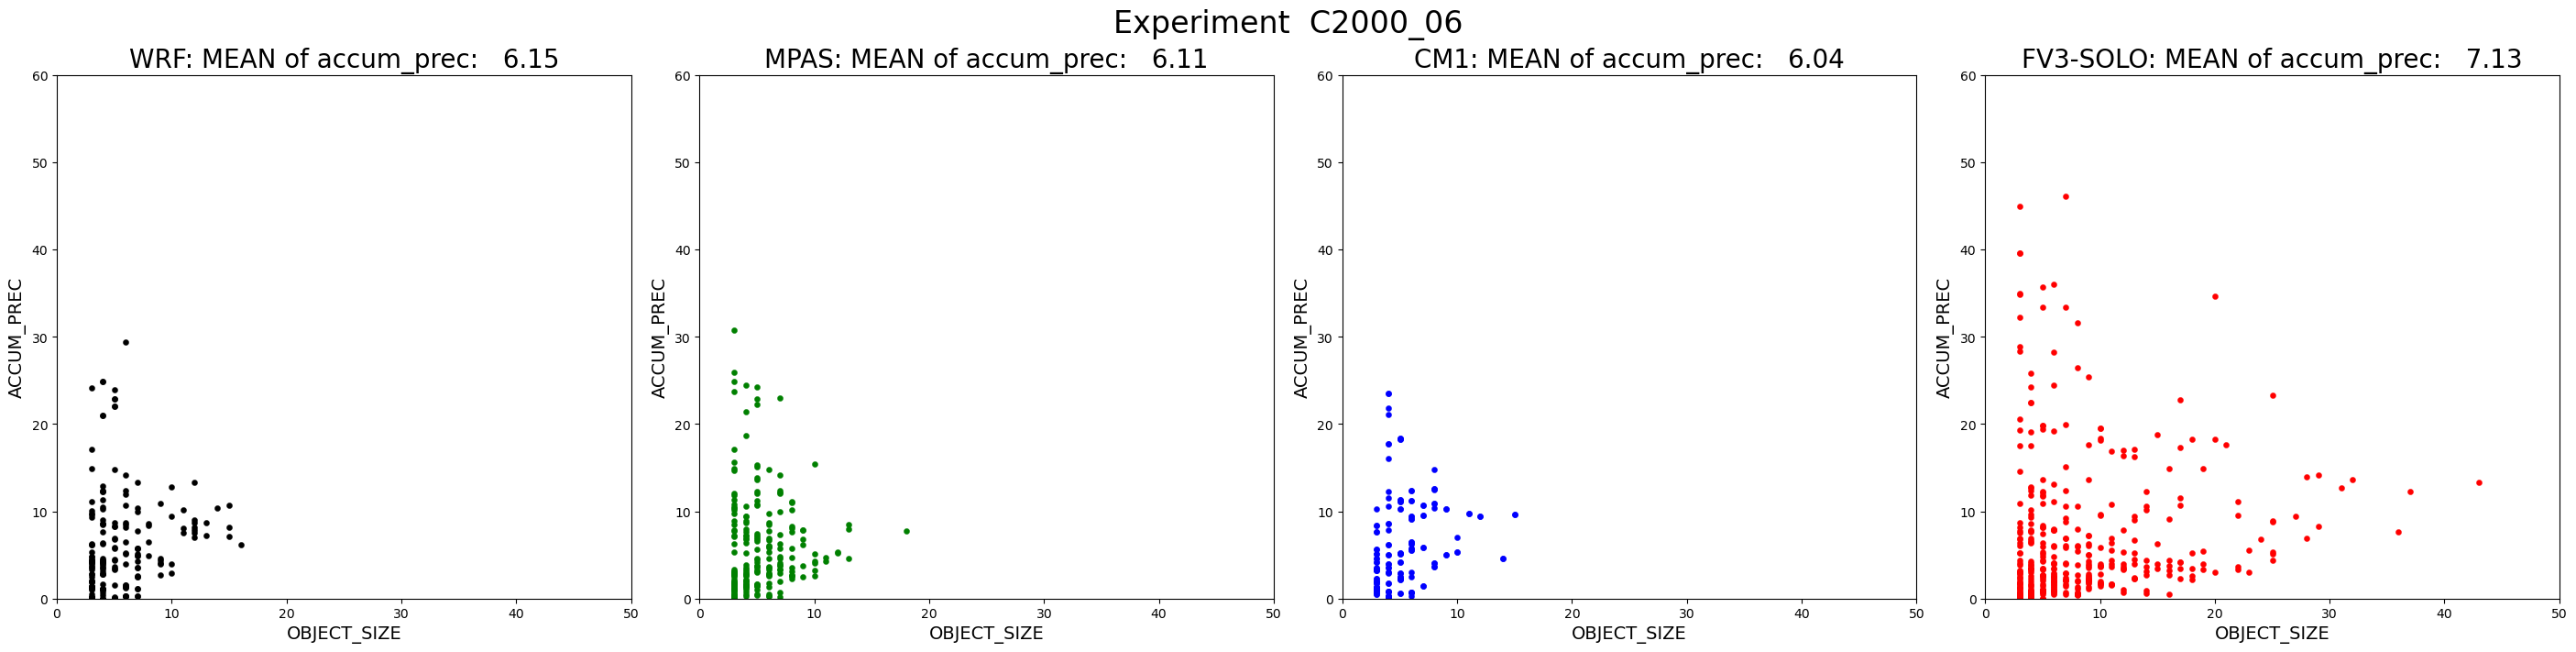

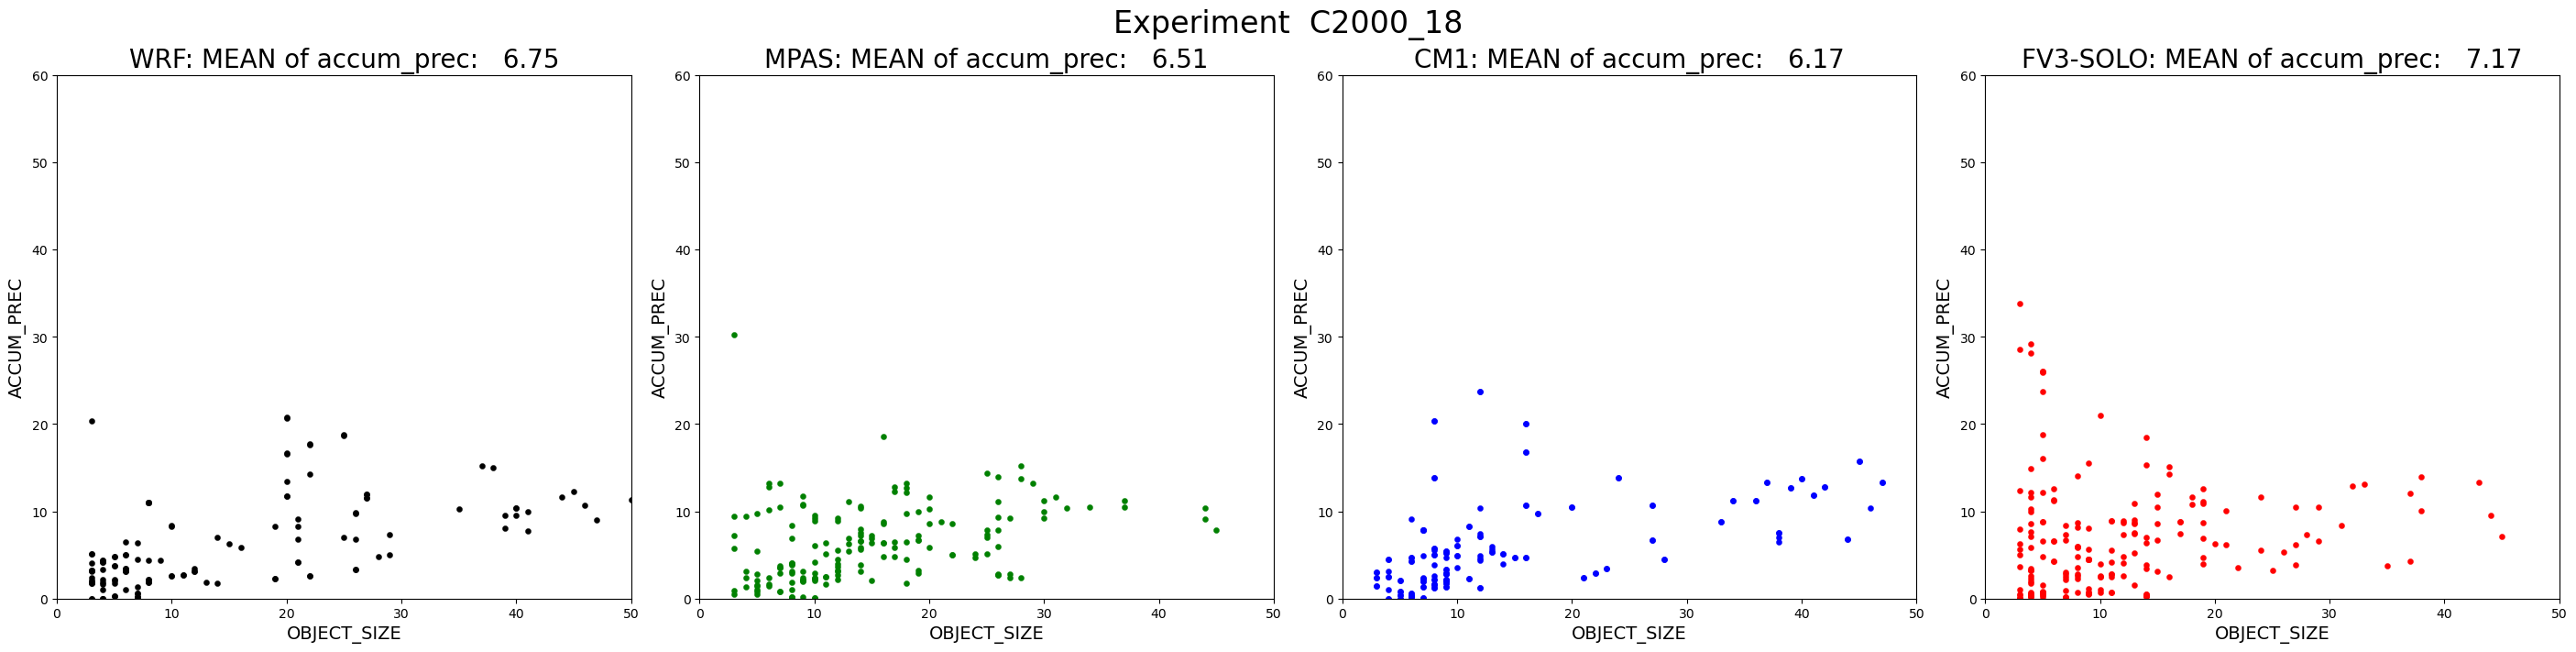

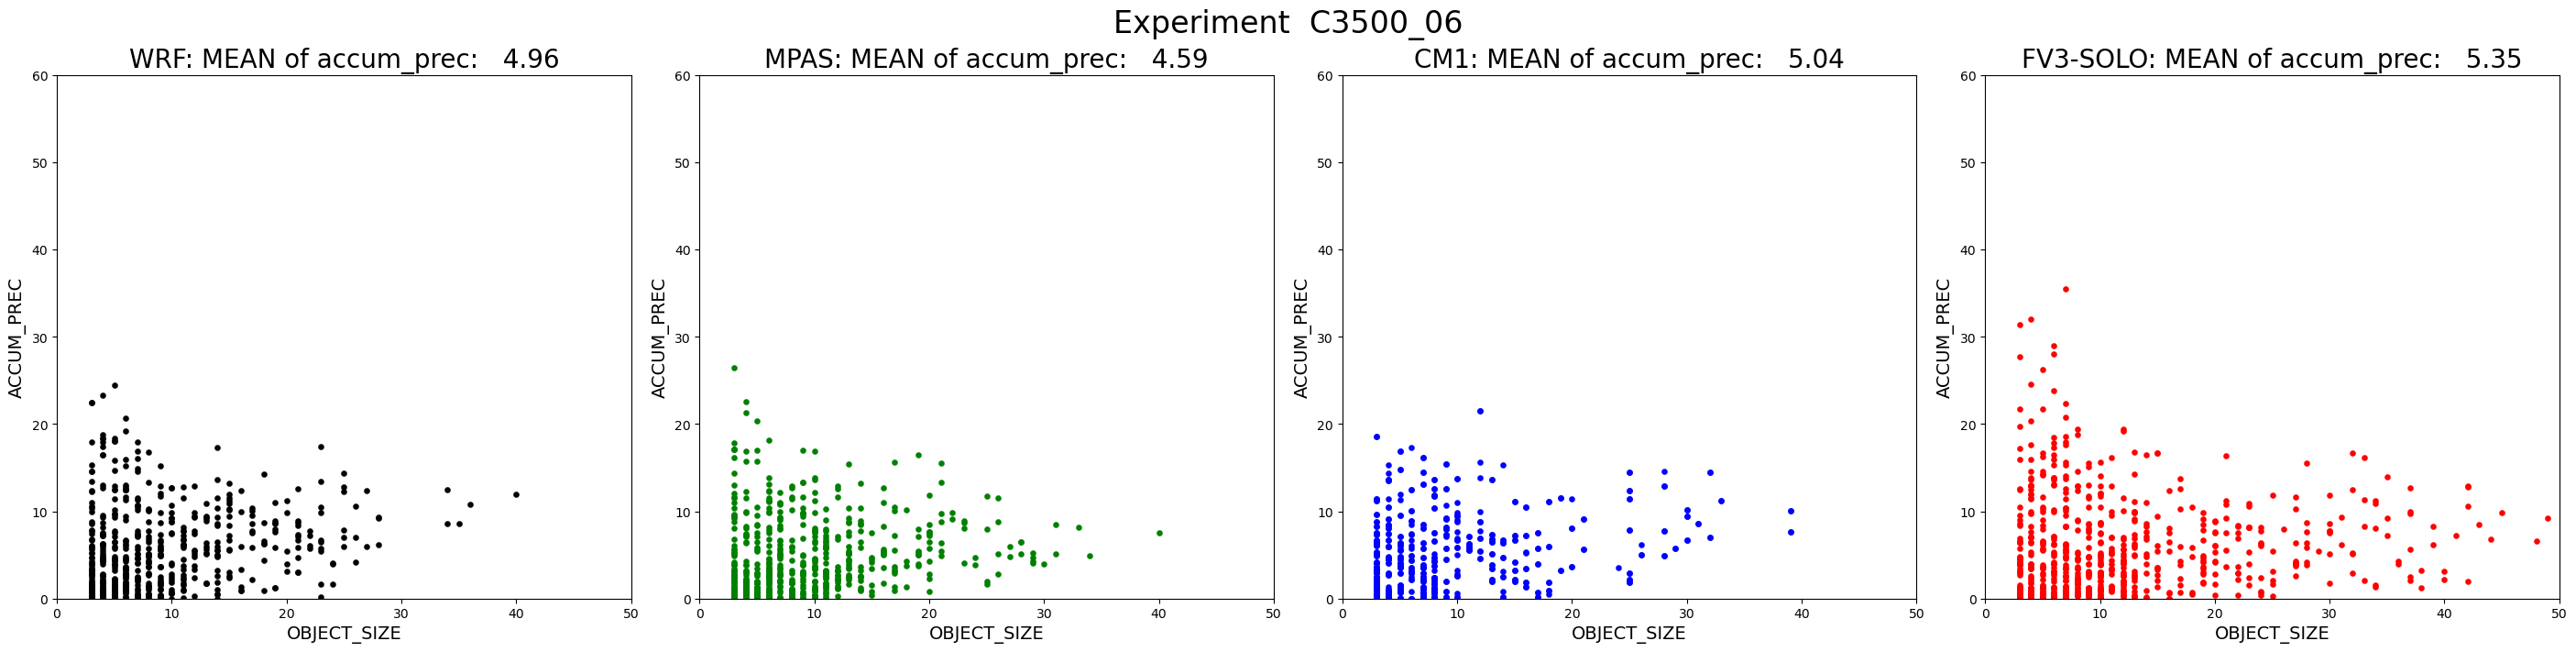

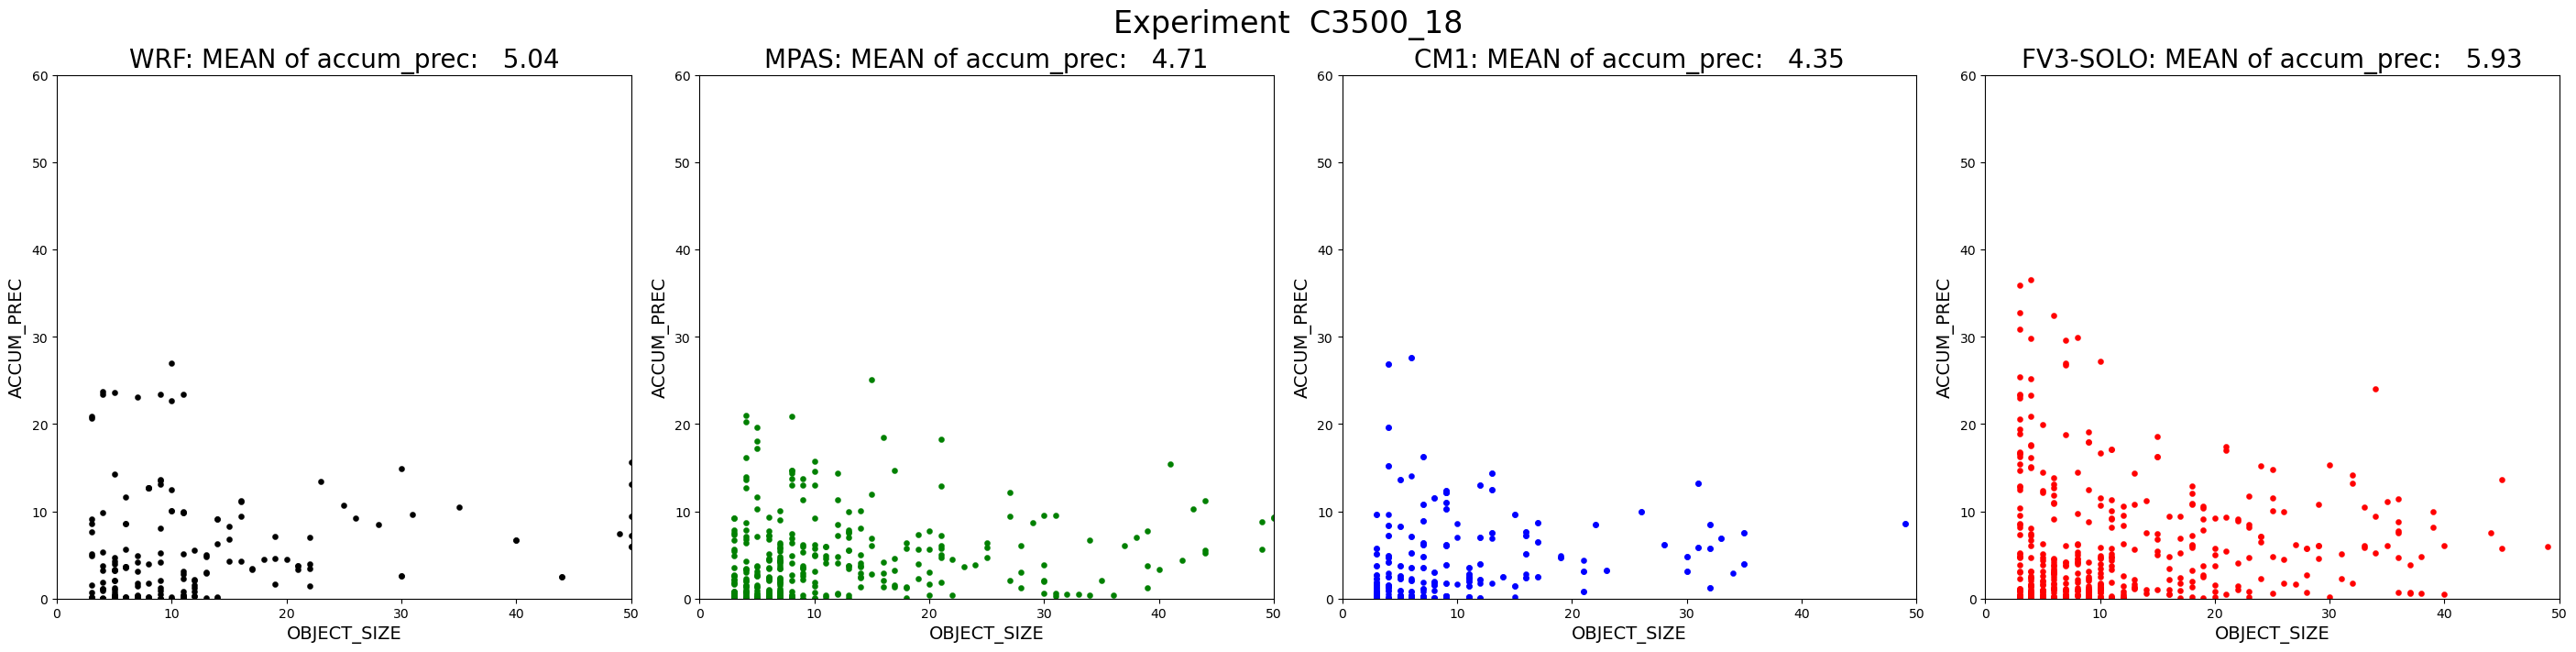

In [55]:
# label = "%s_%s" % ("C2000", "06")
# for key in models: 
#     mdata = models[key]
#     t0 = mdata[label]['tindex'][0]
#     t1 = mdata[label]['tindex'][8]
    
#     size = mdata[label]['size'][t0:t1]
#     w    = mdata[label]['w'][:,t0:t1].max(axis=0)
#     p    = mdata[label]['accum_prec'][:,t0:t1]
#     print(size.shape)
#     print(w.shape)

# plot_var_size(models, var='thetae', max_pix=50, depth=[0,40], xlim=[320,340], max=False)

#plot_var_size(models, xvar='w', var='accum_prec', depth=[0,40], xlim=[0,20], ylim=[0,60], msize=80, max=False)
# plot_var_size(models, var='buoy', depth=[0,40], ylim=[-0.1,0.1], msize=80, max=False)
plot_var_size(models, var='accum_prec', depth=[0,40], ylim=[0,60], max=True)
# plot_var_size(models, max_pix=50, depth=[0,40], ylim=[0,20], max=False)

In [51]:
#----------------------------------------------------
def mk_boxplot(models, var='w', colors='k', max_pix=100, ylim=[0,20], depth=[0,40], max=True, msize=80, alpha=1.0, marker=".", plabel="", **kwargs):
    
    titles = ["0-6 Hour Updraft Sizes", "0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes"]

    allcape = ("C2000", "C3500")
    allshear = ("06", "18")
    
    for cape in allcape:

        for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(1,4, constrained_layout=True,figsize=(16,7))
            
            for n, key in enumerate(models):
                
                mdata = models[key]
                
                t0 = mdata[label]['tindex'][0]
                t1 = mdata[label]['tindex'][20]

                size = mdata[label]['size'][t0:t1]
                if max:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].max(axis=0)
                else:
                    w    = mdata[label][var][depth[0]:depth[1],t0:t1].mean(axis=0)

                if key == 'solo':

                    ax[3].violinplot(w[size<max_pix], **kwargs)
                    ax[3].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.2f" % \
                                   ('FV3-SOLO', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'cm1':
                    ax[2].violinplot(w[size<max_pix], **kwargs)
                    ax[2].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('CM1', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'wrf':
                    ax[0].violinplot(w[size<max_pix], **kwargs)
                    ax[0].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('WRF', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

                if key == 'mpas':
                    ax[1].violinplot(w[size<max_pix], **kwargs)
                    ax[1].set_title("%s: # Pts: %3.0d \n MEAN of %s:  %5.3f" % \
                                    ('MPAS', len(size<max_pix), var.upper(), np.mean(w[size<max_pix])), fontsize=14)

#                     ax[n].set_title("%s - (Updraft Size in Pixels)" % (titles[n]))
                # ax[n].axhline(0.5*(ylim[0]+ylim[1]), color='k', linestyle='--', alpha=0.25)
#                     ax[n].axhline(y=0.9,  color='k', linestyle='--')

                # ax[n].set_xlim(0,max_pix)
                ax[n].set_ylim(ylim[:])
                # ax[n].set_xlabel("Size (pix)", fontsize=14)
                # ax[n].set_ylabel(var.upper() , fontsize=14)
            
            plt.suptitle("Experiment %s %s" % (plabel, label), fontsize=24)
            plt.savefig("BoxPlot_%s_2D_%s.png" % (var.upper(), label))

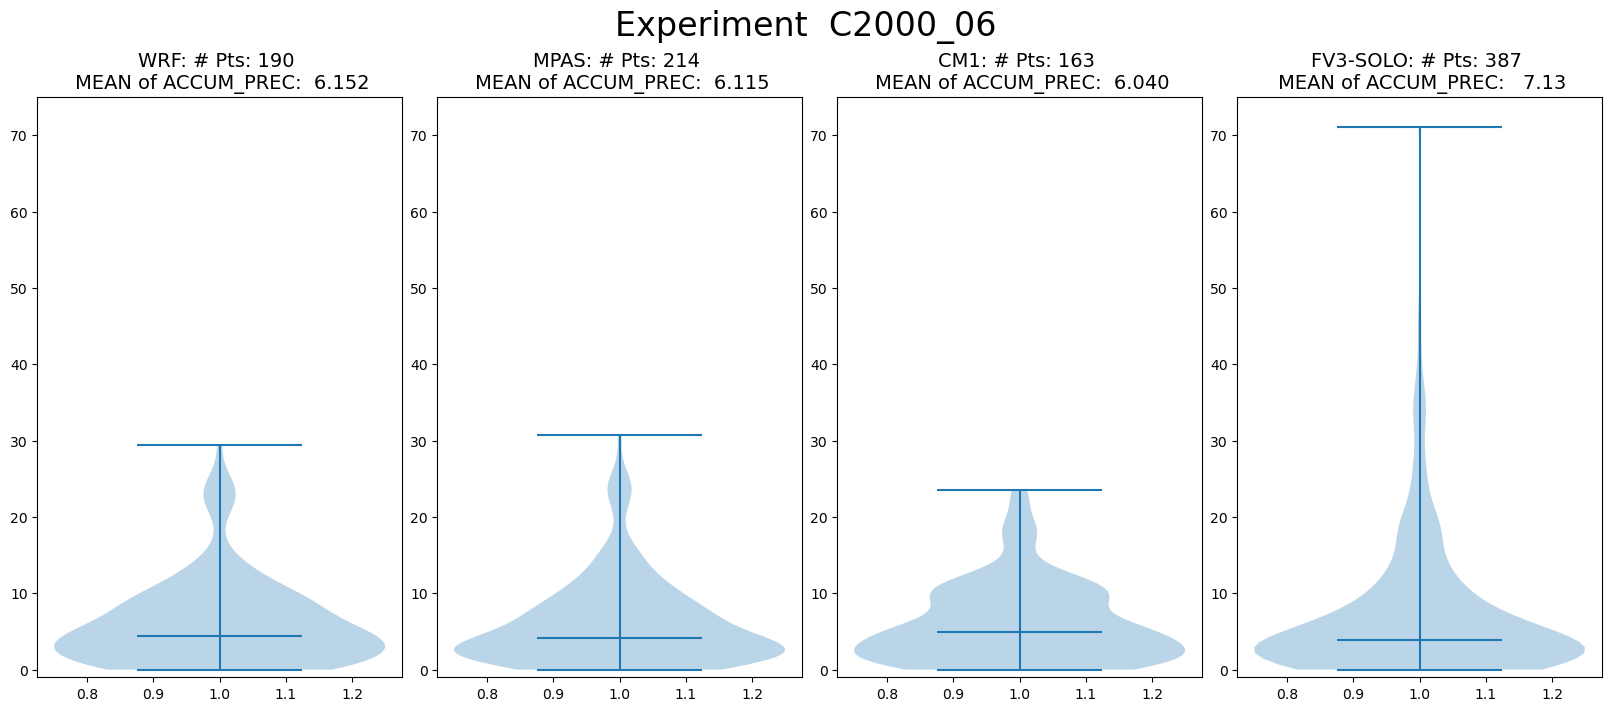

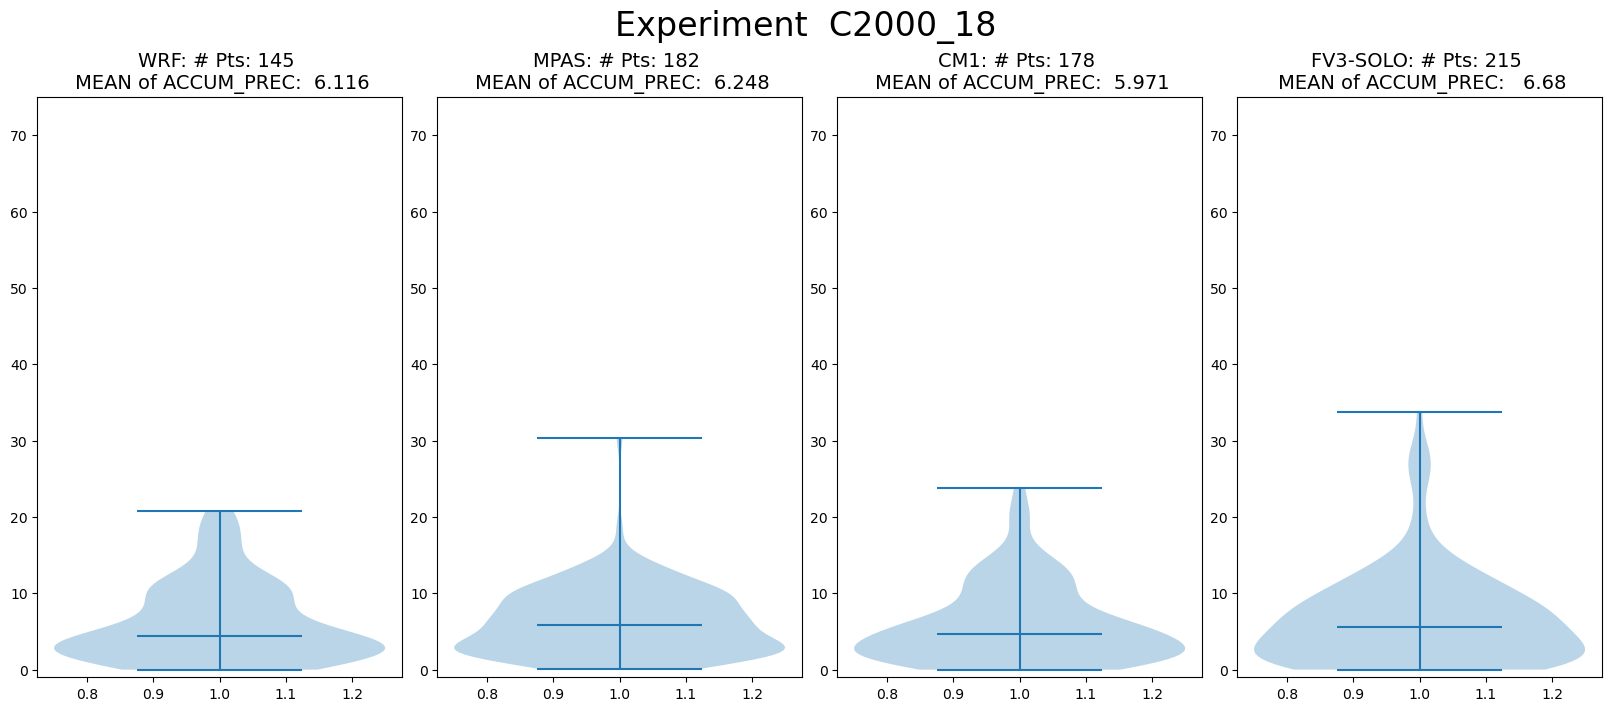

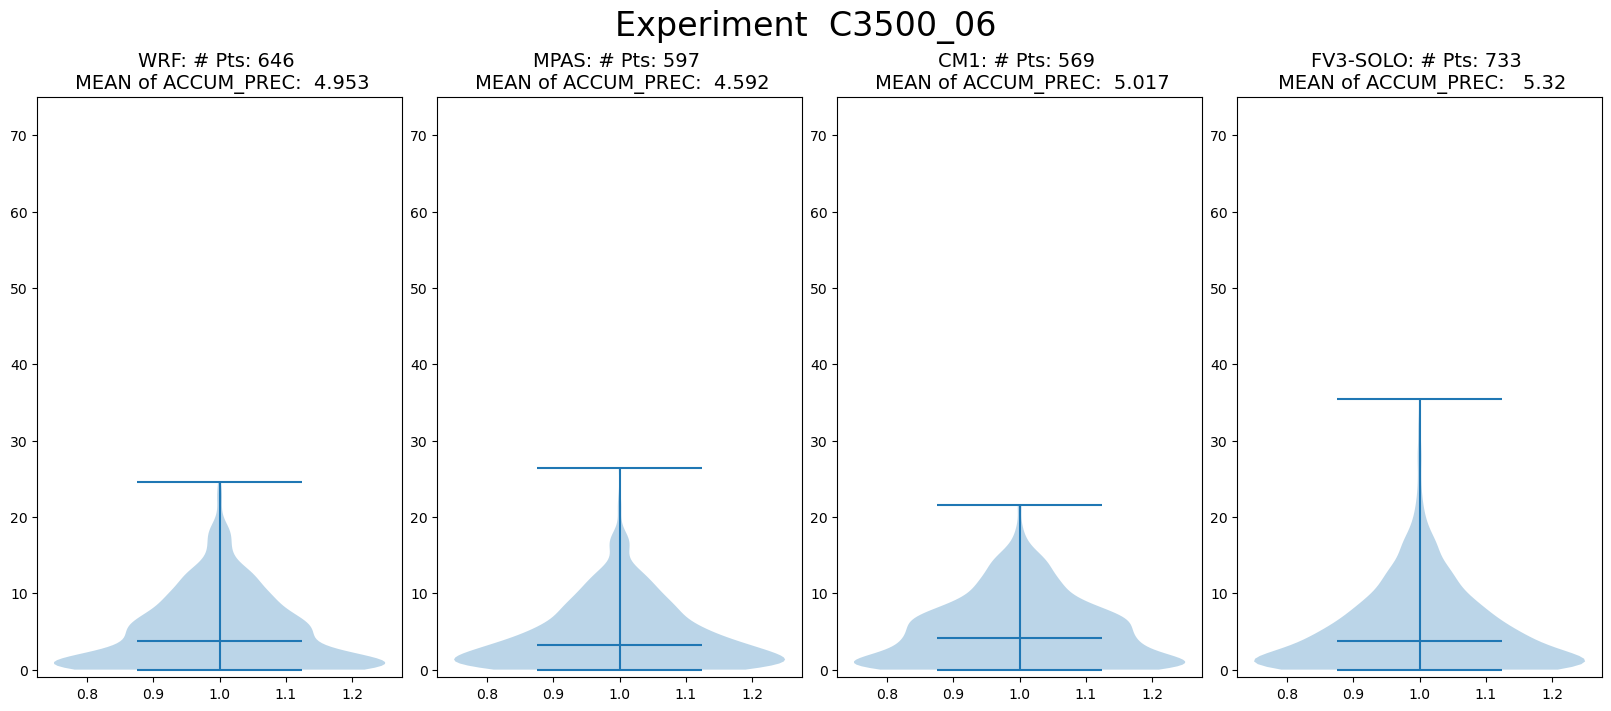

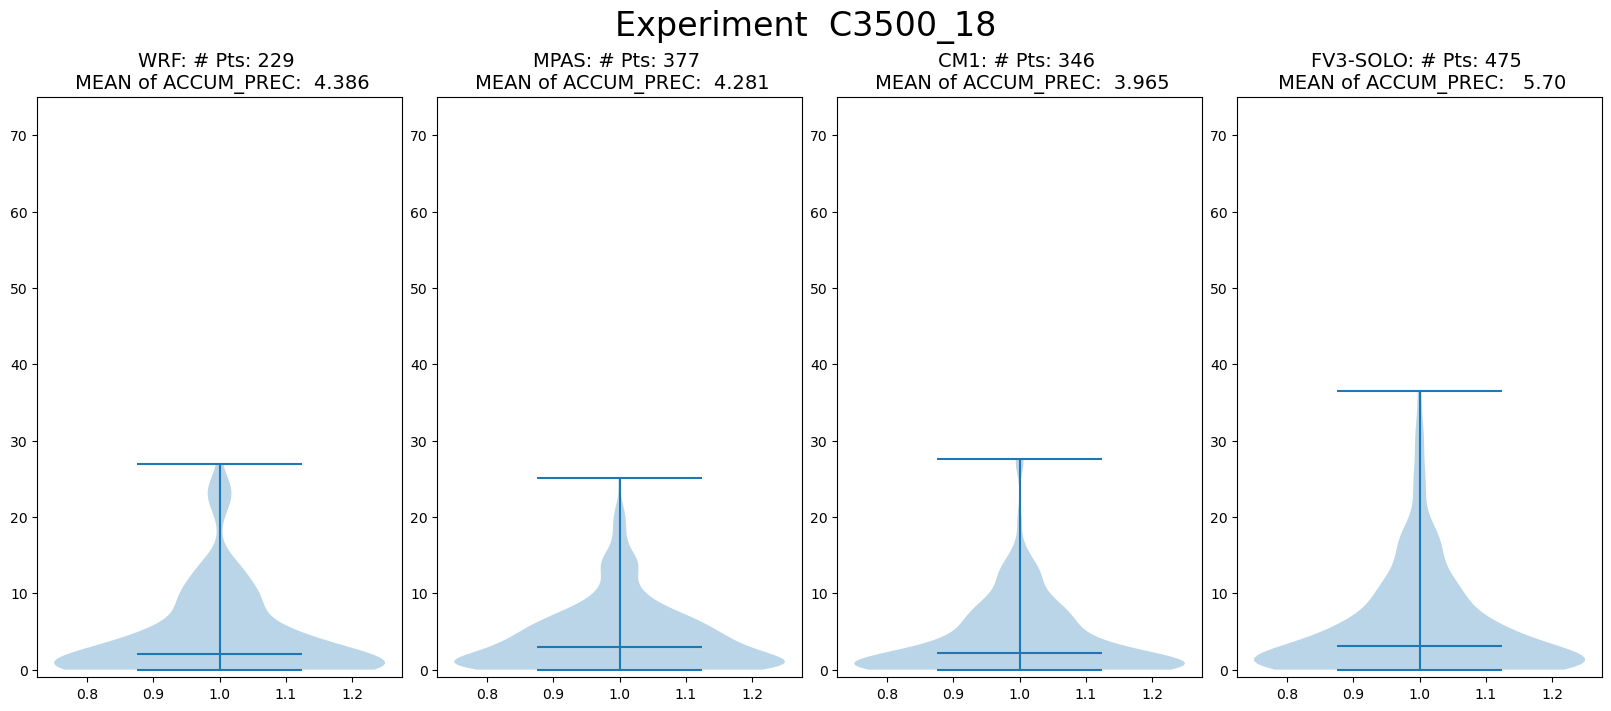

In [53]:
#mk_boxplot(models, var='buoy', max_pix=50, depth=[0,40], ylim=[-0.1,0.1], msize=80, max=False)
mk_boxplot(models, var='accum_prec', max_pix=50, depth=[0,40], ylim=[-1,75], max=False, showmedians=False)
#mk_boxplot(models, max_pix=50, depth=[0,40], ylim=[0,12], max=False)

In [113]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
ds = xa.open_dataset("/work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc", decode_times=False)
# print(ds)

t=20
ds_small=ds.isel(time=t,grid_xt=slice(64,192),grid_yt=slice(64,192))
ds_ref=ds.isel(time=0,grid_xt=0,grid_yt=0)
print(ds_ref['pfull'])

<xarray.DataArray 'pfull' (pfull: 60)>
array([ 43.614677,  50.58378 ,  57.112206,  63.821526,  70.811905,  78.27187 ,
        86.26582 ,  94.8073  , 103.90844 , 113.57964 , 123.82971 , 134.66559 ,
       146.09221 , 158.11314 , 170.72945 , 183.94095 , 197.74487 , 212.13754 ,
       227.1126  , 242.66206 , 258.7766  , 275.44495 , 292.65454 , 310.39114 ,
       328.63913 , 347.38123 , 366.59967 , 386.2756  , 406.3879  , 426.91577 ,
       447.83743 , 469.13055 , 490.77145 , 512.73615 , 535.0022  , 557.545   ,
       580.33923 , 603.3609  , 626.5848  , 649.9866  , 673.54346 , 697.23157 ,
       721.0274  , 744.94727 , 768.9717  , 792.7775  , 815.9177  , 838.1427  ,
       859.33813 , 879.40344 , 898.22766 , 915.7209  , 931.7789  , 946.3301  ,
       959.2798  , 970.566   , 980.1263  , 987.9095  , 994.0884  , 998.4039  ],
      dtype=float32)
Coordinates:
    grid_xt  float32 1.0
    grid_yt  float32 1.0
    time     float32 900.0
  * pfull    (pfull) float32 43.61 50.58 57.11 63.82 ... 98

In [124]:
phalf = ds_small.phalf

ptop  = 100*phalf[0]
phalf = 100*phalf[1:]
phyd  = ds_small.delp.sum(dim="pfull") + ptop

phyd_ref   = ds_ref.delp.sum(dim="pfull") + ptop
psphum     = ((ds_small.spfh)*ds_small.delp).sum(dim="pfull")
psphum_ref = ((ds_ref.spfh)*ds_ref.delp).sum(dim="pfull")

#qp and qn are **weight** per grid cell and not specific ratios
pcond=((ds_small.qp + ds_small.qn)).sum(dim="pfull")

#print(phyd_ref)
print(ds_small.nhpres_pert)

<xarray.DataArray 'nhpres_pert' (pfull: 60, grid_yt: 128, grid_xt: 128)>
array([[[ 3.320312e-02,  5.322266e-02, ...,  5.175781e-02,  3.369141e-02],
        [ 7.812500e-03,  5.859375e-03, ...,  2.783203e-02,  1.708984e-02],
        ...,
        [ 9.765625e-03,  3.466797e-02, ...,  2.246094e-02,  5.761719e-02],
        [ 3.808594e-02,  3.369141e-02, ...,  4.101562e-02,  3.710938e-02]],

       [[ 3.662109e-02,  1.074219e-02, ...,  3.466797e-02,  3.369141e-02],
        [ 3.417969e-02,  7.080078e-02, ...,  2.587891e-02,  3.710938e-02],
        ...,
        [ 2.783203e-02,  2.441406e-02, ...,  4.882812e-02, -5.371094e-03],
        [ 8.300781e-03,  2.246094e-02, ...,  4.296875e-02,  1.220703e-02]],

       ...,

       [[ 9.671875e+00,  1.132031e+01, ..., -2.550781e+01,  1.000000e+01],
        [ 1.359375e+00, -1.075781e+01, ..., -8.742188e+00, -7.125000e+00],
        ...,
        [ 9.632812e+00, -2.117188e+00, ...,  8.820312e+00,  9.578125e+00],
        [ 2.054688e+00,  2.335938e+00, ..., -8

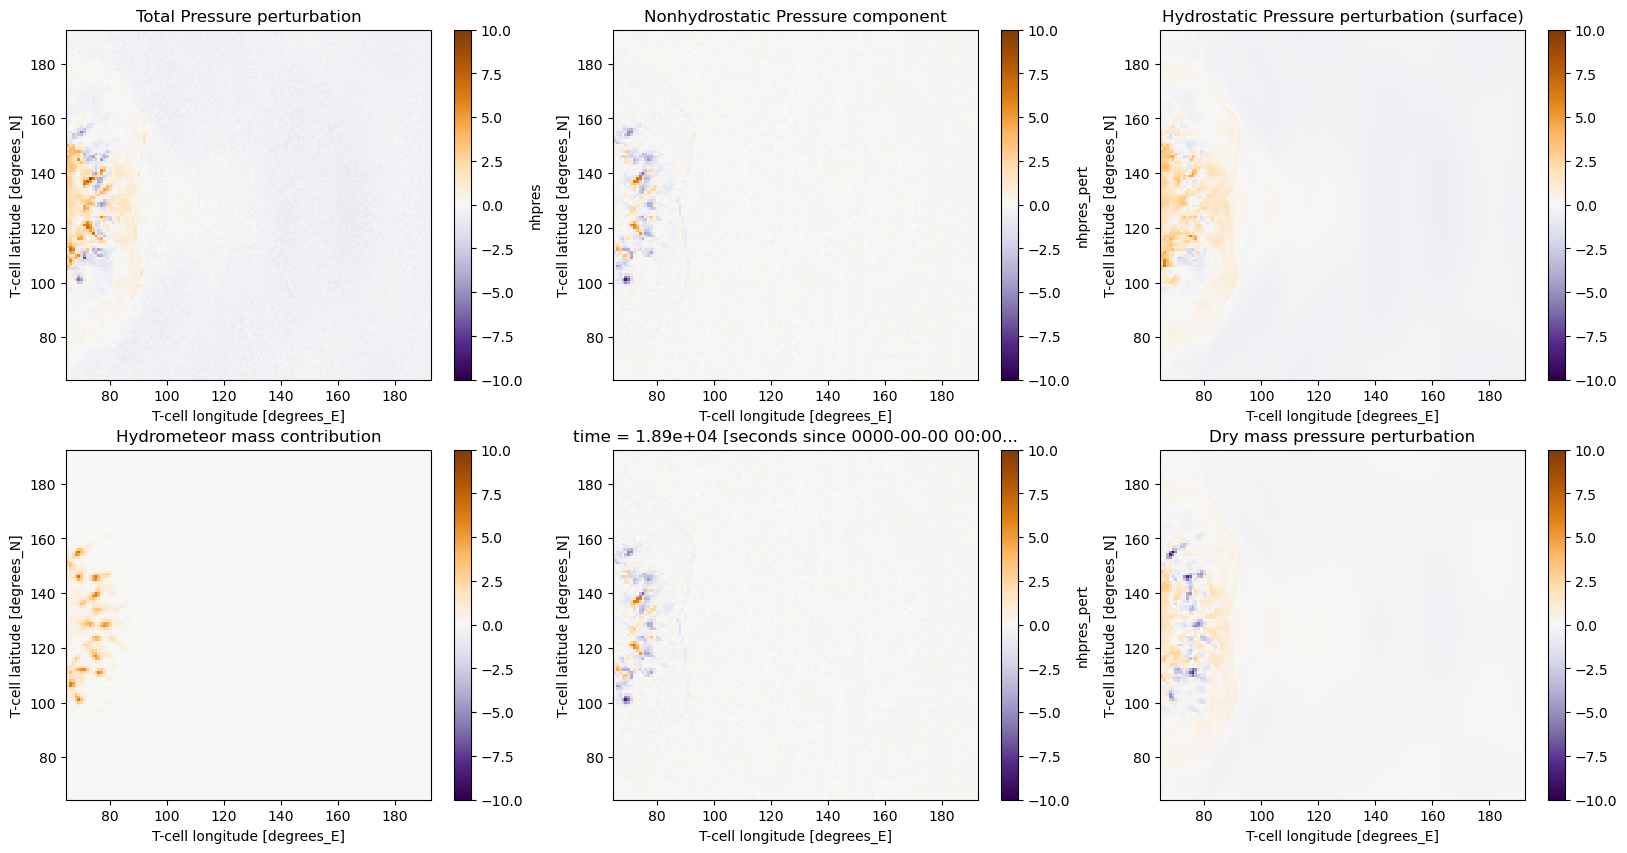

In [127]:
fig = plt.figure(figsize=(20,10))

#nhpres anom
ax = fig.add_subplot(2,3,1)
((ds_small.nhpres[-1,:,:]-ds_ref.nhpres[-1])/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Total Pressure perturbation")

# nhpres_pert
ax = fig.add_subplot(2,3,2)
((ds_small.nhpres_pert[-1,:,:])/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Nonhydrostatic Pressure component")

ax = fig.add_subplot(2,3,3)
((phyd-phyd_ref)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Hydrostatic Pressure perturbation (surface)")

# #hydrometeors
ax = fig.add_subplot(2,3,4)
(pcond/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
ax.set_title("Hydrometeor mass contribution")

#dry pressure perturbation
ax = fig.add_subplot(2,3,5)
((ds_small.nhpres_pert[-1]/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r')))
ax.set_title("Dry mass pressure perturbation");
#((psphum)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))
#ax.set_title("Water vapor mass contribution");

#dry pressure perturbation
ax = fig.add_subplot(2,3,6)
((phyd-(phyd_ref-psphum_ref)-pcond-psphum)/100.).plot(ax=ax,vmax=10,vmin=-10,cmap=plt.get_cmap('PuOr_r'))

ax.set_title("Dry mass pressure perturbation");

# #Add location of cross section
# #NOTE: apparently this behavior will change in a future version of Matplotlib
# #  so if it makes empty plots then just remove it.
# ycross=44
# for n in range(6):
#     ax = fig.add_subplot(2,3,n+1)
#     ax.set_xlabel("")
#     ax.plot(ax.get_xlim(),[ycross,ycross],color='k',linewidth=5,alpha=0.5)